In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer

# 1. The LASSO and Boosting for Regression

### a) Download the Communities and Crime data1 from https://archive.ics.uci. edu/ml/datasets/Communities+and+Crime. Use the first 1495 rows of data as the training set and the rest as the test set. 
### b) The data set has missing values. Use a data imputation technique to deal with the missing values in the data set. The data description mentions some features are nonpredictive. Ignore those features.

In [2]:
head = ["state","county","community","communityname", "fold","population","householdsize","racepctblack","racePctWhite","racePctAsian","racePctHisp","agePct12t21","agePct12t29","agePct16t24","agePct65up","numbUrban","pctUrban","medIncome","pctWWage","pctWFarmSelf","pctWInvInc","pctWSocSec","pctWPubAsst","pctWRetire","medFamInc","perCapInc","whitePerCap","blackPerCap","indianPerCap","AsianPerCap","OtherPerCap","HispPerCap","NumUnderPov","PctPopUnderPov","PctLess9thGrade","PctNotHSGrad","PctBSorMore","PctUnemployed","PctEmploy","PctEmplManu","PctEmplProfServ","PctOccupManu","PctOccupMgmtProf","MalePctDivorce","MalePctNevMarr","FemalePctDiv","TotalPctDiv","PersPerFam","PctFam2Par","PctKids2Par","PctYoungKids2Par","PctTeen2Par","PctWorkMomYoungKids","PctWorkMom","NumIlleg","PctIlleg","NumImmig","PctImmigRecent","PctImmigRec5","PctImmigRec8","PctImmigRec10","PctRecentImmig","PctRecImmig5","PctRecImmig8","PctRecImmig10","PctSpeakEnglOnly","PctNotSpeakEnglWell","PctLargHouseFam","PctLargHouseOccup","PersPerOccupHous","PersPerOwnOccHous","PersPerRentOccHous","PctPersOwnOccup","PctPersDenseHous","PctHousLess3BR","MedNumBR","HousVacant","PctHousOccup","PctHousOwnOcc","PctVacantBoarded","PctVacMore6Mos","MedYrHousBuilt","PctHousNoPhone","PctWOFullPlumb","OwnOccLowQuart","OwnOccMedVal","OwnOccHiQuart","RentLowQ","RentMedian","RentHighQ","MedRent","MedRentPctHousInc","MedOwnCostPctInc","MedOwnCostPctIncNoMtg","NumInShelters","NumStreet","PctForeignBorn","PctBornSameState","PctSameHouse85","PctSameCity85","PctSameState85","LemasSwornFT","LemasSwFTPerPop","LemasSwFTFieldOps","LemasSwFTFieldPerPop","LemasTotalReq","LemasTotReqPerPop","PolicReqPerOffic","PolicPerPop","RacialMatchCommPol","PctPolicWhite","PctPolicBlack","PctPolicHisp","PctPolicAsian","PctPolicMinor","OfficAssgnDrugUnits","NumKindsDrugsSeiz","PolicAveOTWorked","LandArea","PopDens","PctUsePubTrans","PolicCars","PolicOperBudg","LemasPctPolicOnPatr","LemasGangUnitDeploy","LemasPctOfficDrugUn","PolicBudgPerPop","ViolentCrimesPerPop"]
data = pd.read_csv('communities.data.txt',names = head)
data.drop(['state', 'county', 'community', 'communityname', 'fold'], axis=1, inplace=True)
data = data.replace("?", np.nan)
mean_vale = Imputer(missing_values=np.nan, strategy='mean', axis=1)
data = pd.DataFrame(mean_vale.fit_transform(data), columns=data.columns)
data

population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0           0.19           0.33          0.02          0.90          0.12   
1           0.00           0.16          0.12          0.74          0.45   
2           0.00           0.42          0.49          0.56          0.17   
3           0.04           0.77          1.00          0.08          0.12   
4           0.01           0.55          0.02          0.95          0.09   
5           0.02           0.28          0.06          0.54          1.00   
6           0.01           0.39          0.00          0.98          0.06   
7           0.01           0.74          0.03          0.46          0.20   
8           0.03           0.34          0.20          0.84          0.02   
9           0.01           0.40          0.06          0.87          0.30   
10          0.13           0.71          0.15          0.07          1.00   
11          0.02           0.46          0.08          0.91          0.07   
12          0.03           0.47          0.01          0.96          0.13   
13          0.01           0.44          0.00          0.98          0.04   
14          0.04           0.36          0.01          0.85          0.14   
15          0.03           0.34          0.06          0.93          0.03   
16          0.15           0.31          0.40          0.63          0.14   
17          0.01           0.53          0.01          0.94          0.20   
18          0.02           0.47          0.01          0.97          0.07   
19          0.00           0.41          0.05          0.96          0.01   
20          0.25           0.54          0.05          0.71          0.48   
21          1.00           0.42          0.47          0.59          0.12   
22          0.01           0.34          0.02          0.87          0.07   
23          0.11           0.43          0.04          0.89          0.09   
24          0.02           0.96          0.05          0.00          1.00   
25          0.00           0.33          0.02          0.91          0.16   
26          0.06           0.49          0.46          0.00          1.00   
27          0.01           0.37          0.01          0.99          0.02   
28          0.01           0.27          0.43          0.64          0.08   
29          0.00           0.50          0.01          0.98          0.02   
...          ...            ...           ...           ...           ...   
1964        0.09           0.45          1.00          0.08          0.11   
1965        1.00           0.36          0.44          0.64          0.06   
1966        0.09           0.41          0.07          0.74          0.39   
1967        0.01           0.66          0.00          0.97          0.10   
1968        0.00           0.24          0.51          0.53          0.11   
1969        1.00           0.29          0.21          0.29          1.00   
1970        0.00           0.37          0.38          0.69          0.04   
1971        0.06           0.39          0.32          0.73          0.04   
1972        0.08           0.49          0.07          0.69          0.27   
1973        0.00           0.38          0.03          0.97          0.04   
1974        0.00           0.41          0.62          0.51          0.02   
1975        0.05           0.27          0.03          0.89          0.27   
1976        0.06           0.29          0.03          0.93          0.18   
1977        0.01           0.35          0.06          0.94          0.06   
1978        0.01           0.54          0.02          0.94          0.13   
1979        0.02           0.43          0.39          0.63          0.15   
1980        0.06           0.43          0.04          0.93          0.03   
1981        0.07           0.38          0.17          0.84          0.11   
1982        0.00           0.47          0.02          0.98          0.03   
1983        0.01           0.45          0.37          0.65          0.15   
19

In [3]:
TrainingData = data[0:1495]
TestingData = data[1495:]
y_TrainingData = TrainingData[["ViolentCrimesPerPop"]]
x_TrainingData = TrainingData.drop("ViolentCrimesPerPop", axis=1)
y_TestingData = TestingData[["ViolentCrimesPerPop"]]
x_TestingData = TestingData.drop("ViolentCrimesPerPop", axis=1)
y_TrainingData

ViolentCrimesPerPop
0                    0.20
1                    0.67
2                    0.43
3                    0.12
4                    0.03
5                    0.14
6                    0.03
7                    0.55
8                    0.53
9                    0.15
10                   0.24
11                   0.08
12                   0.06
13                   0.09
14                   0.21
15                   0.30
16                   0.49
17                   0.07
18                   0.15
19                   0.03
20                   0.34
21                   0.69
22                   0.21
23                   0.63
24                   0.31
25                   0.12
26                   0.84
27                   0.10
28                   0.49
29                   0.02
...                   ...
1465                 0.36
1466                 0.25
1467                 0.33
1468                 0.04
1469                 0.48
1470                 0.13
1471                 0.01
1472                 0.29
1473                 0.02
1474                 0.03
1475                 0.21
1476                 0.12
1477                 0.41
1478                 0.06
1479                 0.57
1480                 0.37
1481                 0.67
1482                 0.11
1483                 0.03
1484                 0.10
1485                 0.03
1486                 0.81
1487                 0.51
1488                 0.09
1489                 0.01
1490                 0.03
1491                 0.20
1492                 0.30
1493                 0.03
1494                 0.23

[1495 rows x 1 columns]

### c) Plot a correlation matrix for the features in the data set.

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer
import matplotlib.pyplot as plt

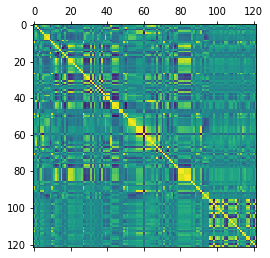

In [6]:
plt.matshow(x_TrainingData.corr())
plt.show()

### d) Calculate the Coefficient of Variation CV for each feature, where CV = s/m ,in which s is sample variance and m is sample mean.

In [6]:
coefficient_variations = {}
for i in x_TrainingData.columns:
    s = np.var(x_TrainingData[i])
    m = np.mean(x_TrainingData[i])
    cv = s/m
    coefficient_variations[i] = cv

print(coefficient_variations)

{'population': 0.2919523711359229, 'householdsize': 0.05841314951192775, 'racepctblack': 0.36693506461196274, 'racePctWhite': 0.08203391575595802, 'racePctAsian': 0.28374019286801483, 'racePctHisp': 0.3764838177214328, 'agePct12t21': 0.057535705117354084, 'agePct12t29': 0.041732690874512056, 'agePct16t24': 0.08390401085685989, 'agePct65up': 0.07297238488927596, 'numbUrban': 0.2684572233362806, 'pctUrban': 0.2867433445700137, 'medIncome': 0.1257992744312723, 'pctWWage': 0.059730753306205996, 'pctWFarmSelf': 0.14306581499134238, 'pctWInvInc': 0.06612797019025467, 'pctWSocSec': 0.06184403723449169, 'pctWPubAsst': 0.16120268679004063, 'pctWRetire': 0.05704736481155753, 'medFamInc': 0.109514059264966, 'perCapInc': 0.10909374562600896, 'whitePerCap': 0.09945090996165706, 'blackPerCap': 0.10479728395449592, 'indianPerCap': 0.13556581202471613, 'AsianPerCap': 0.12320542915565032, 'OtherPerCap': 0.12763119469374115, 'HispPerCap': 0.09063518563418997, 'NumUnderPov': 0.3117268047667174, 'PctPopUn

### e) Pick 128⌋ features with highest CV , and make scatter plots and box plots for them. Can you draw conclusions about significance of those features, just by the scatter plots?

In [7]:
feature = np.sqrt(128)
int(feature)

11

In [8]:
highest_cv = sorted(coefficient_variations, key=coefficient_variations.get, reverse=True)[:11]
highest_cv

['LemasPctOfficDrugUn',
 'NumStreet',
 'racePctHisp',
 'racepctblack',
 'NumInShelters',
 'NumIlleg',
 'PctUsePubTrans',
 'PctNotSpeakEnglWell',
 'NumUnderPov',
 'PctRecentImmig',
 'PctRecImmig5']

In [9]:
Data_e = data[highest_cv]
Data_e

LemasPctOfficDrugUn  NumStreet  racePctHisp  racepctblack  \
0                    0.32       0.00         0.17          0.02   
1                    0.00       0.00         0.07          0.12   
2                    0.00       0.00         0.04          0.49   
3                    0.00       0.00         0.10          1.00   
4                    0.00       0.00         0.05          0.02   
5                    0.00       0.00         0.25          0.06   
6                    0.00       0.00         0.02          0.00   
7                    0.00       0.00         1.00          0.03   
8                    0.00       0.00         0.00          0.20   
9                    0.00       0.00         0.03          0.06   
10                   0.00       0.14         0.41          0.15   
11                   0.00       0.00         0.10          0.08   
12                   0.00       0.00         0.02          0.01   
13                   0.00       0.00         0.01          0.00   
14                   0.00       0.11         0.26          0.01   
15                   0.00       0.00         0.03          0.06   
16                   0.88       0.02         0.06          0.40   
17                   0.00       0.00         0.03          0.01   
18                   0.00       0.00         0.02          0.01   
19                   0.00       0.00         0.01          0.05   
20                   0.76       0.09         0.30          0.05   
21                   0.31       0.36         0.05          0.47   
22                   0.00       0.00         0.11          0.02   
23                   0.56       0.01         0.06          0.04   
24                   0.00       0.00         1.00          0.05   
25                   0.00       0.00         0.09          0.02   
26                   0.00       0.00         0.43          0.46   
27                   0.00       0.00         0.01          0.01   
28                   0.00       0.00         0.01          0.43   
29                   0.00       0.00         0.02          0.01   
...                   ...        ...          ...           ...   
1964                 0.00       0.00         0.14          1.00   
1965                 0.44       0.31         0.02          0.44   
1966                 0.00       0.29         0.45          0.07   
1967                 0.00       0.00         0.02          0.00   
1968                 0.00       0.01         0.11          0.51   
1969                 0.64       1.00         0.26          0.21   
1970                 0.00       0.00         0.02          0.38   
1971                 0.00       0.00         0.01          0.32   
1972                 0.00       0.06         0.35          0.07   
1973                 0.00       0.00         0.01          0.03   
1974                 0.00       0.00         0.01          0.62   
1975                 0.00       0.00         0.04          0.03   
1976                 0.00       0.00         0.03          0.03   
1977                 0.00       0.00         0.01          0.06   
1978                 0.00       0.00         0.04          0.02   
1979                 0.00       0.01         0.14          0.39   
1980                 0.00       0.00         0.09          0.04   
1981                 0.62       0.00         0.04          0.17   
1982                 0.00       0.00         0.01          0.02   
1983                 0.00       0.00         0.05          0.37   
1984                 0.00       0.00         0.02          0.01   
1985                 0.00       0.00         0.00          0.55   
1986                 0.00       0.00         0.02          0.02   
1987                 0.00       0.00         0.01          0.00   
1988                 0.00       0.00         0.01          1.00   
1989                 0.00       0.00         0.16          0.10   
1990                 0.00       0.00         0.32          0.46   
1991                 0.91       0.02         0.25    

In [63]:
 ## They are high-correlated.

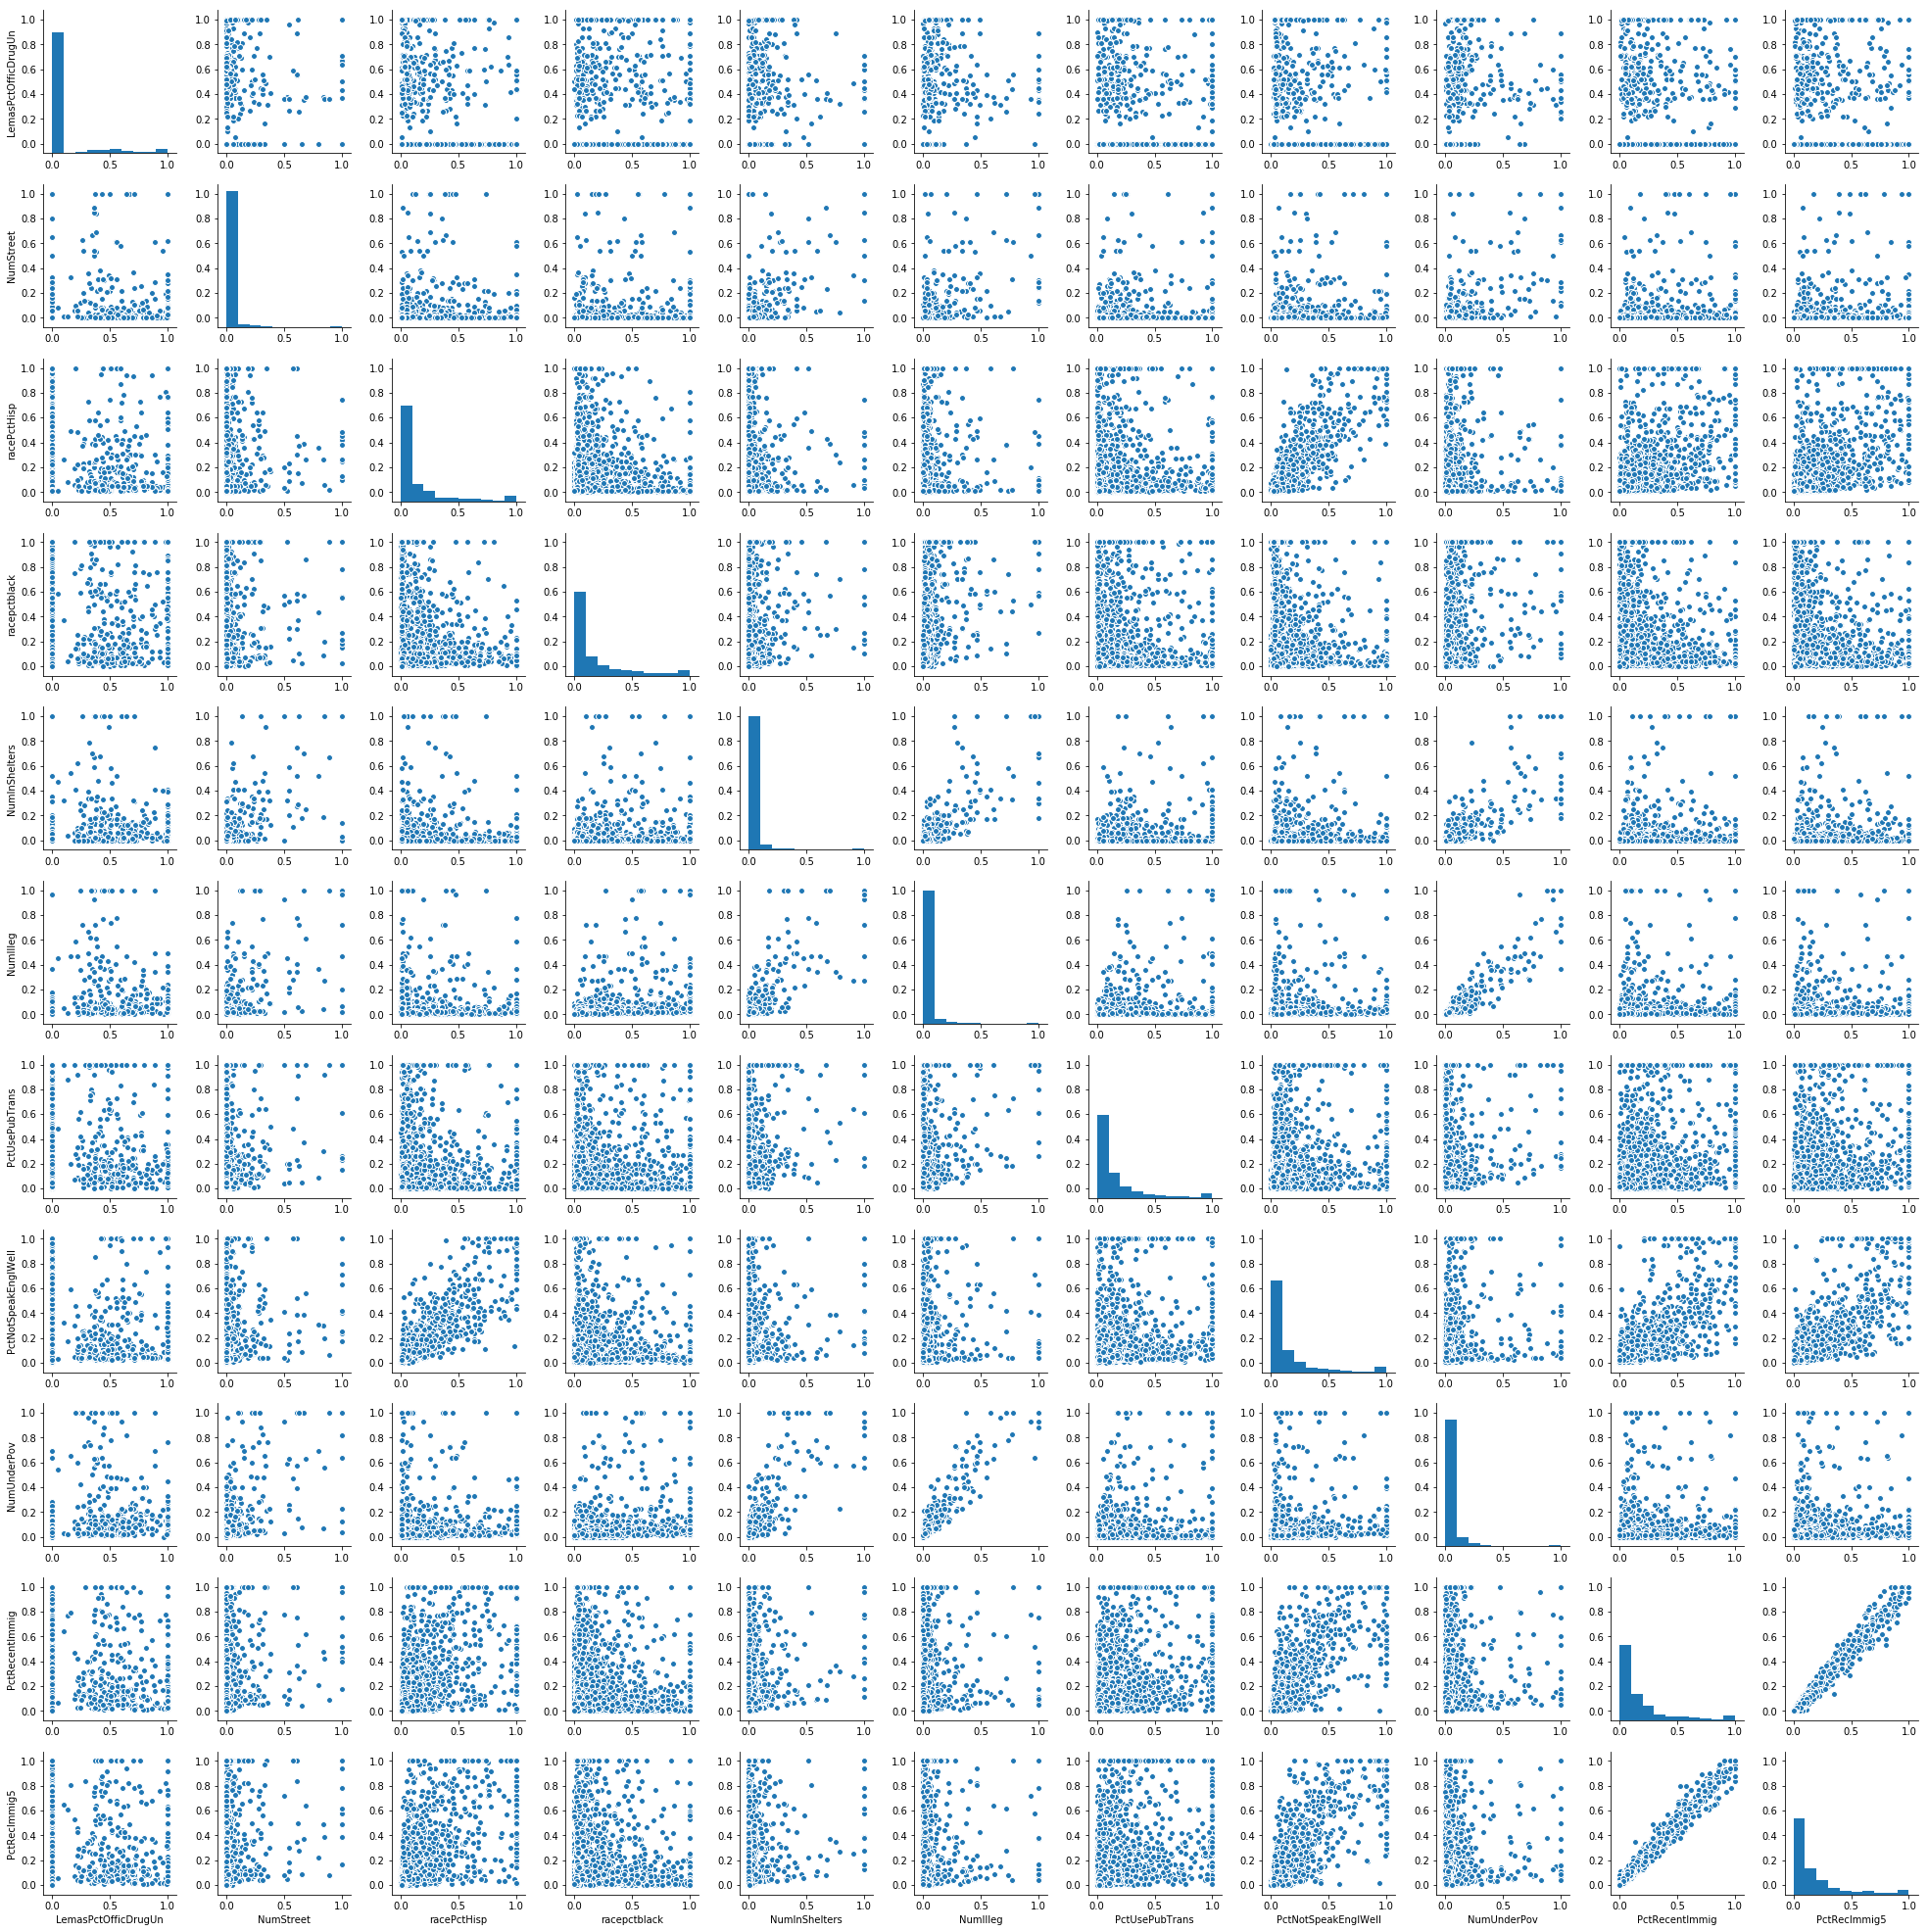

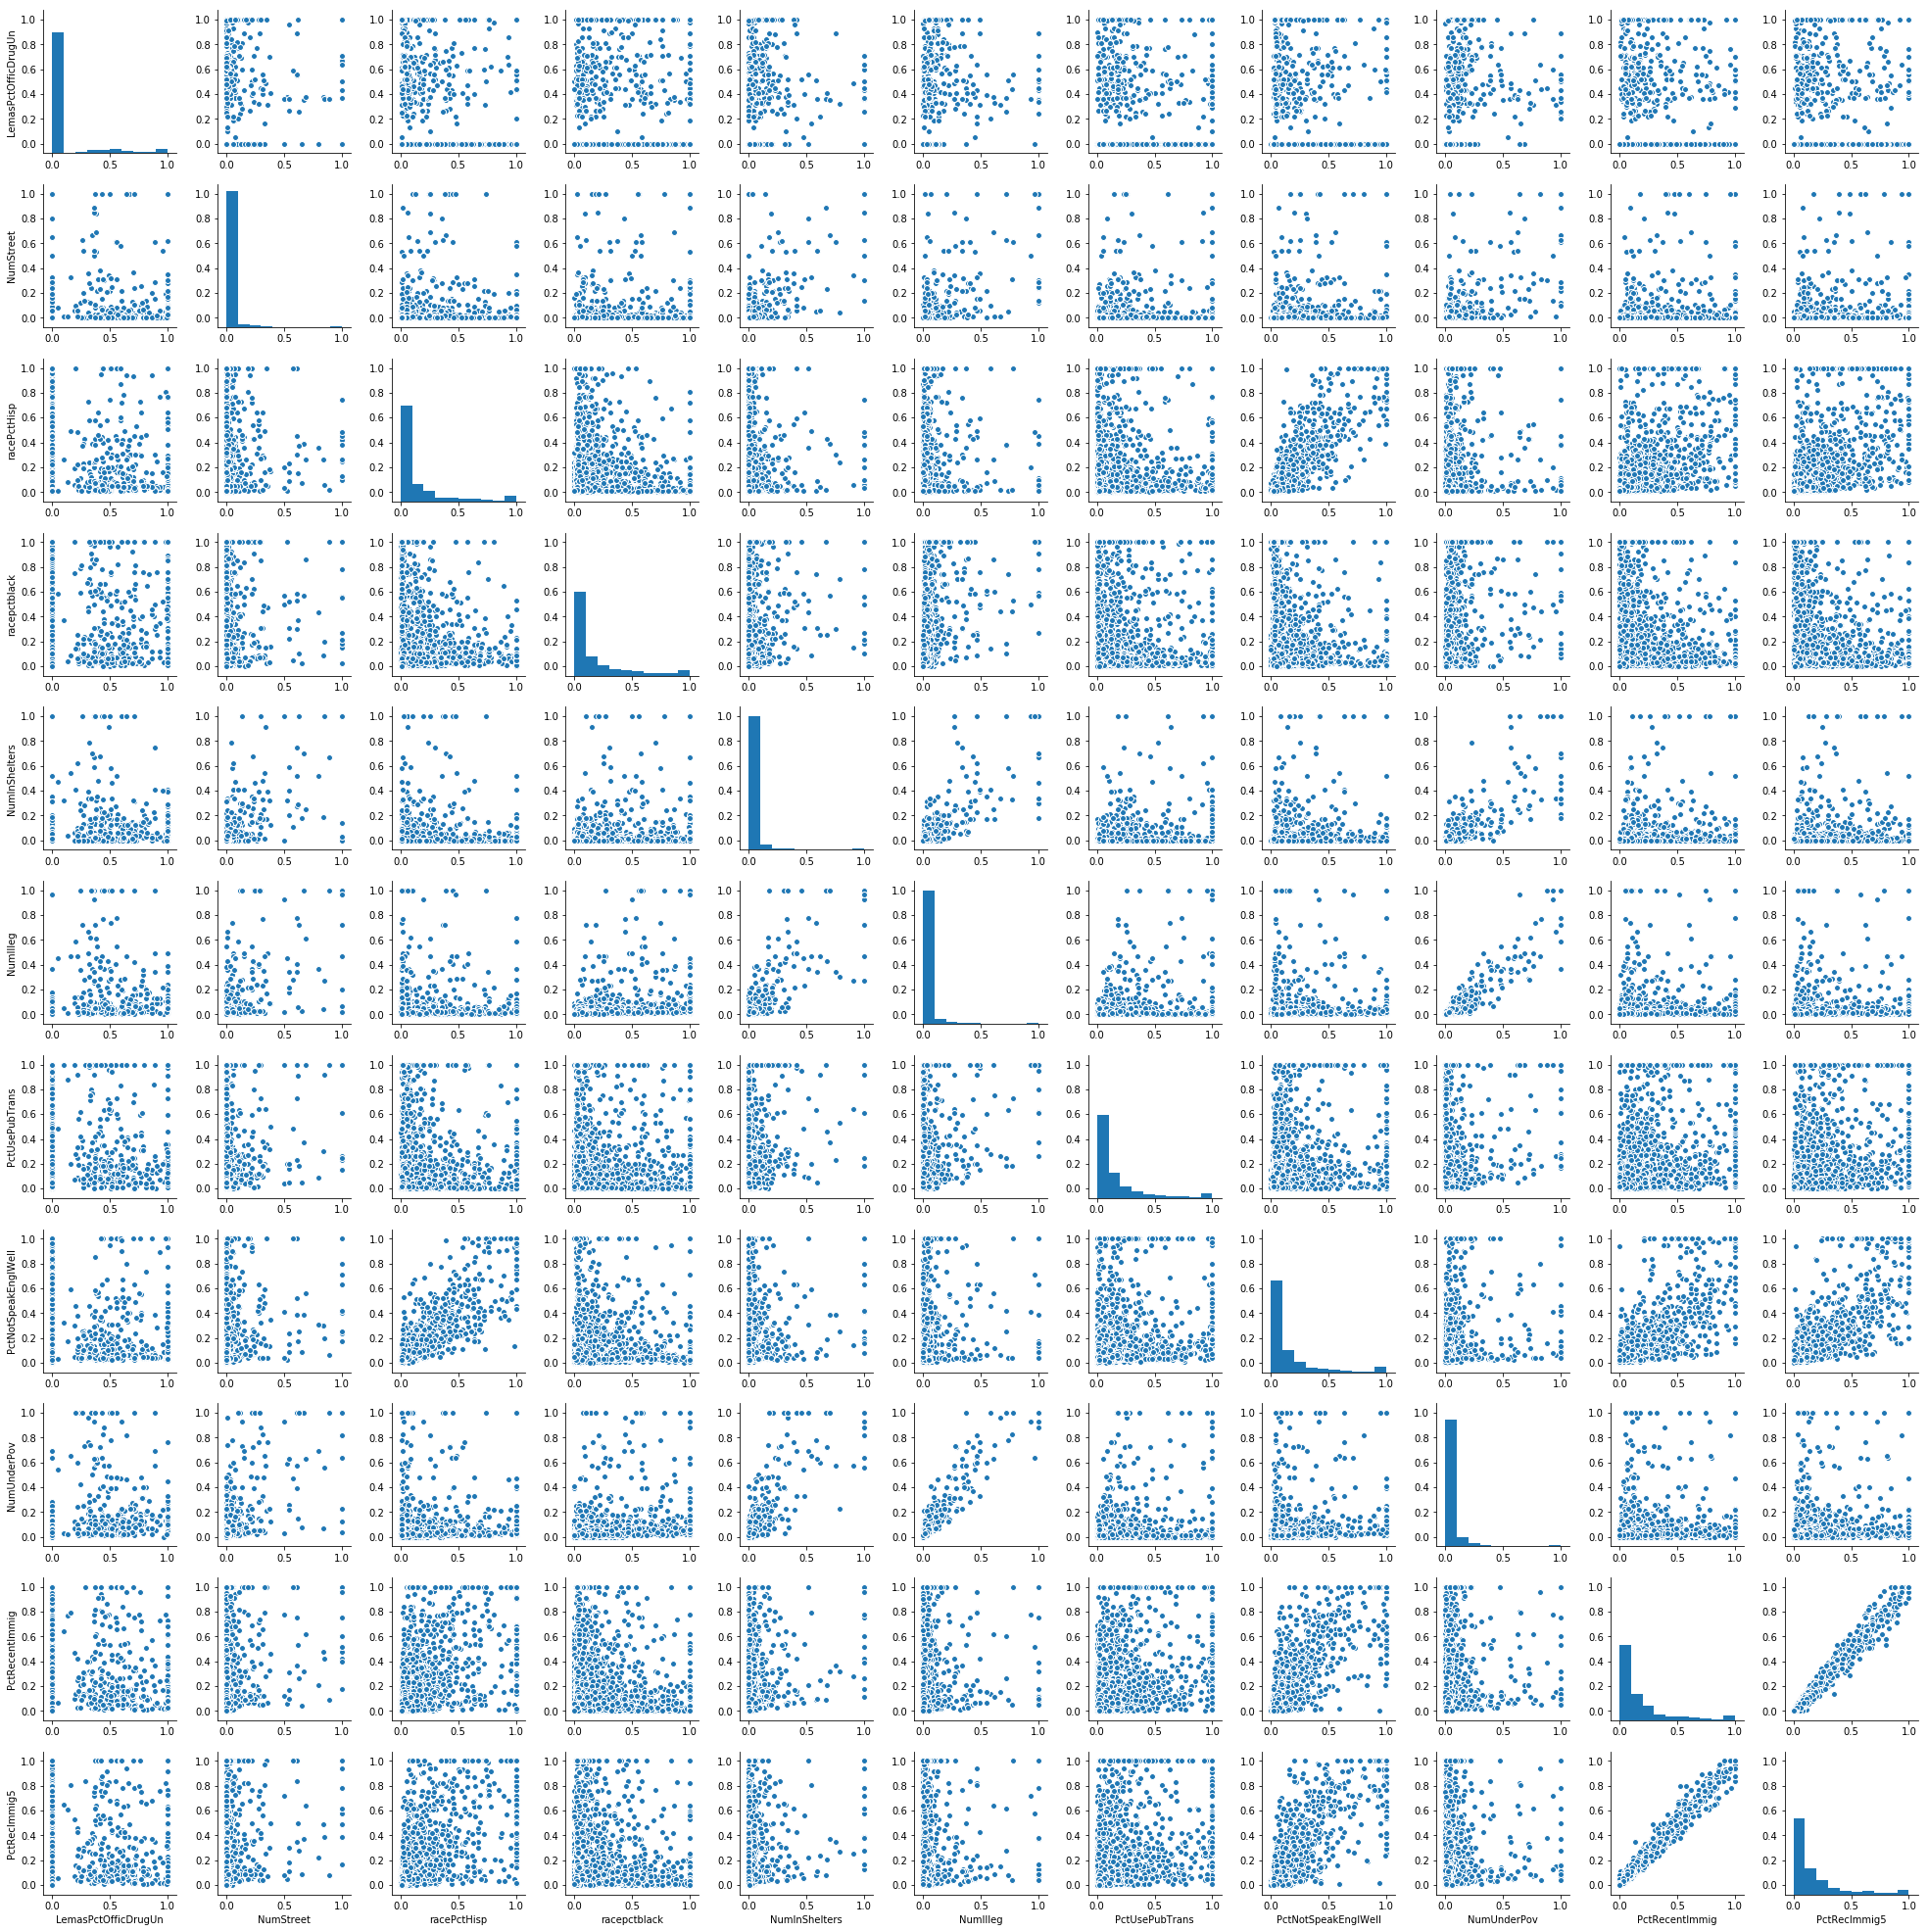

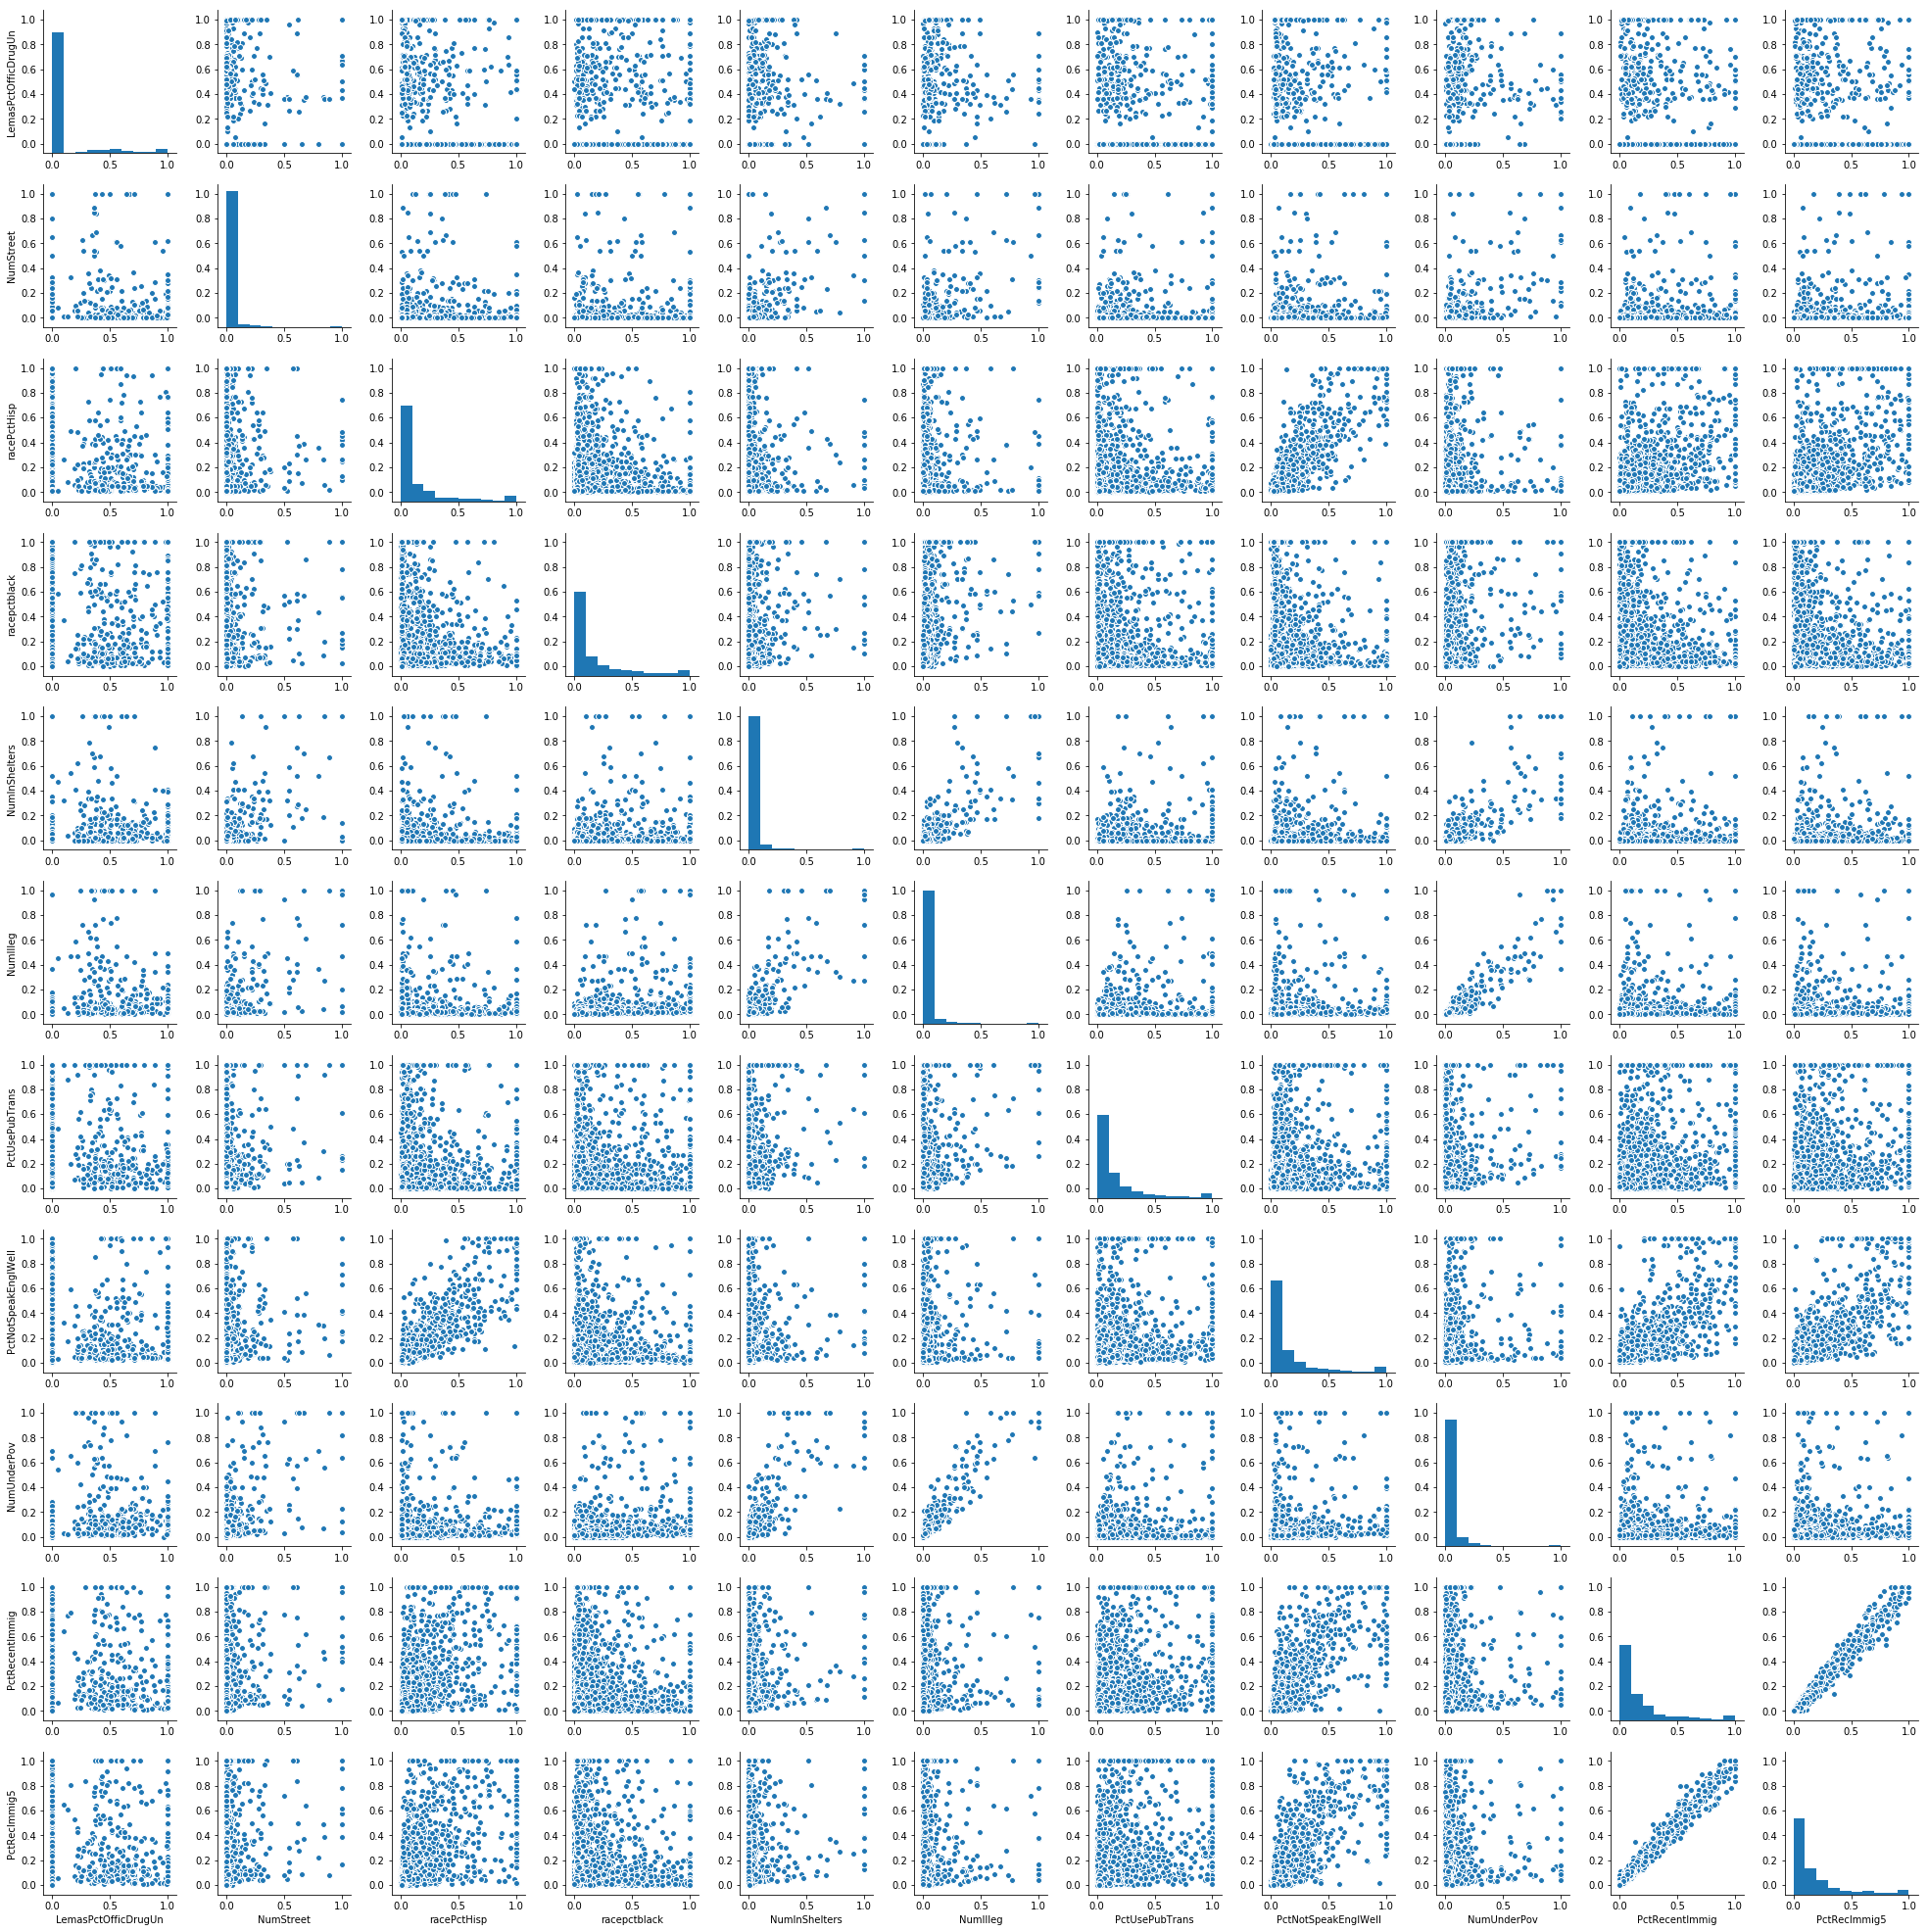

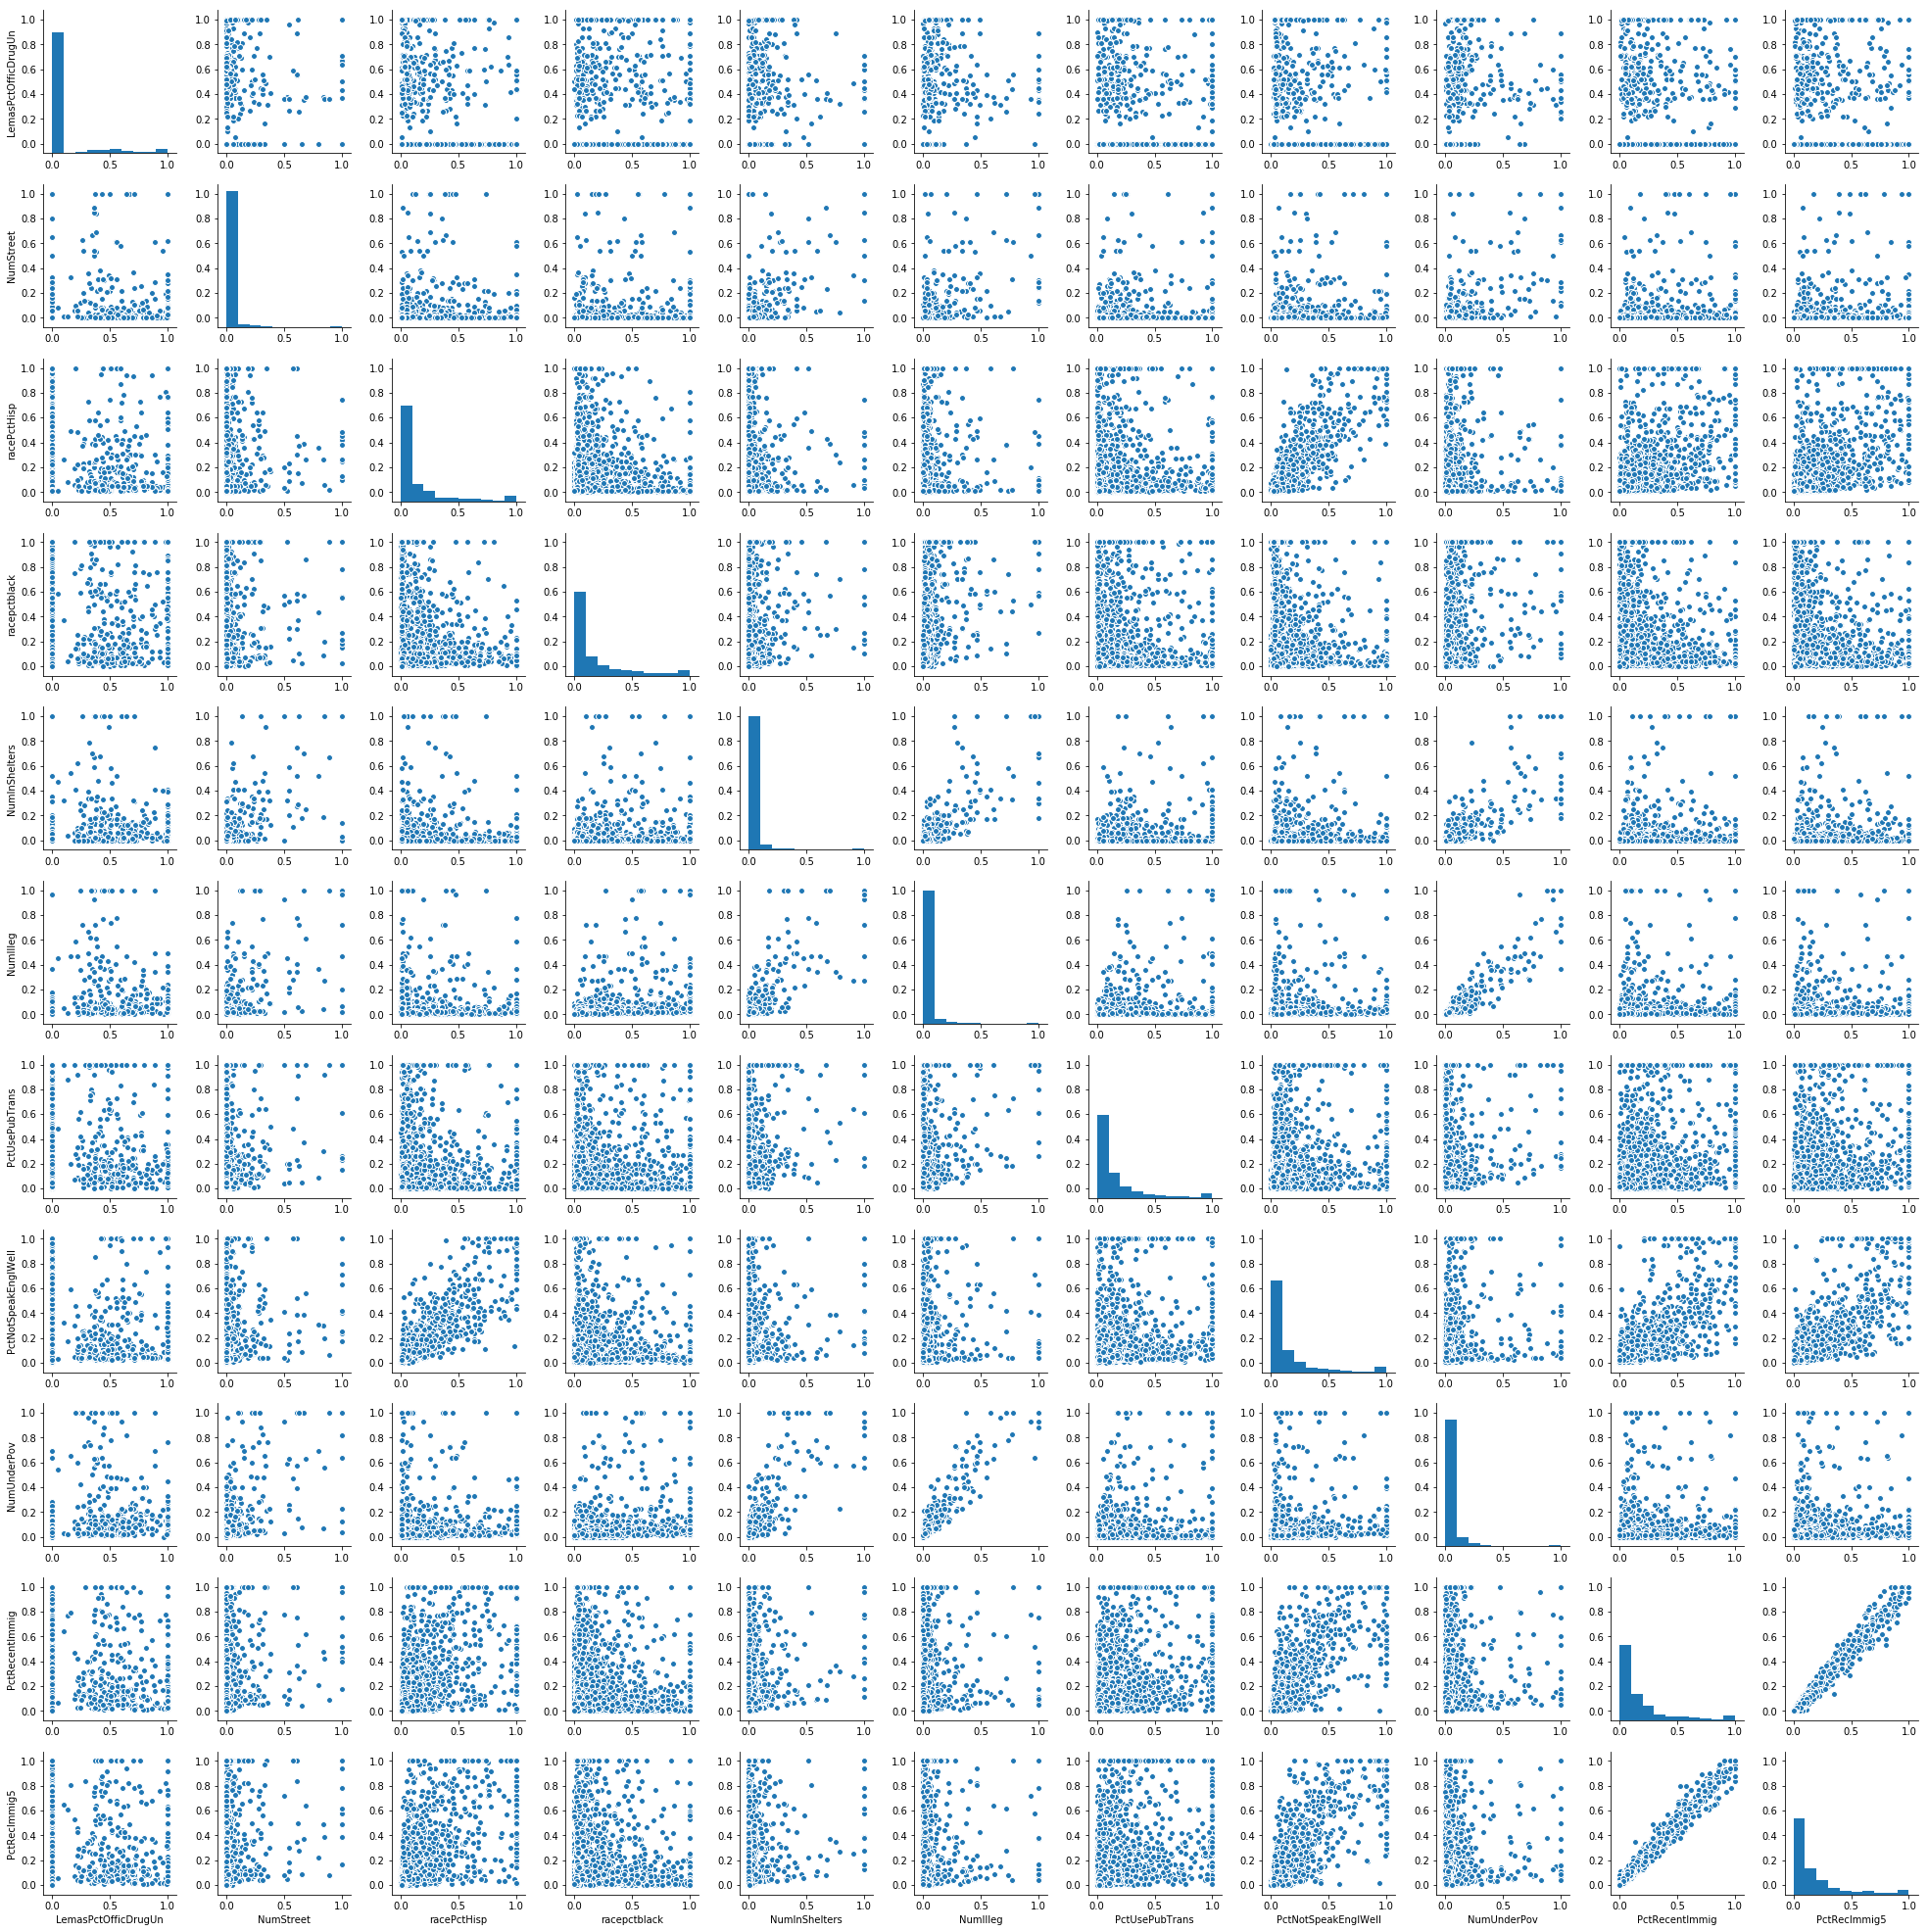

In [13]:
sns.pairplot(Data_e)
plt.show()

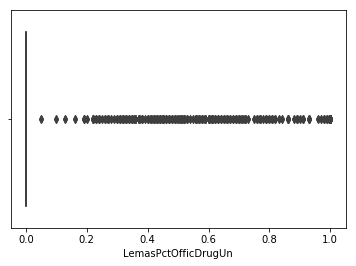

In [15]:
sns.boxplot(x=Data_e['LemasPctOfficDrugUn'])
plt.show()

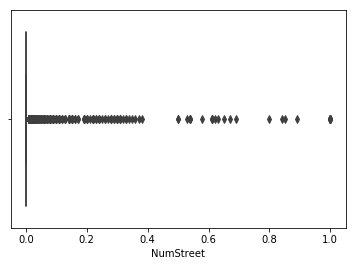

In [16]:
sns.boxplot(x=Data_e['NumStreet'])
plt.show()

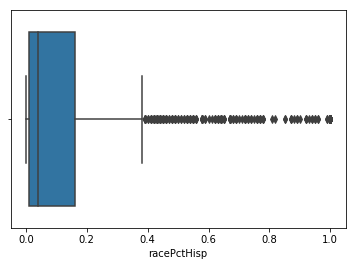

In [17]:
sns.boxplot(x=Data_e['racePctHisp'])
plt.show()

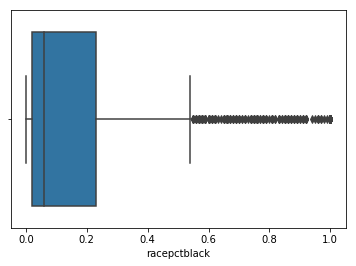

In [18]:
sns.boxplot(x=Data_e['racepctblack'])
plt.show()

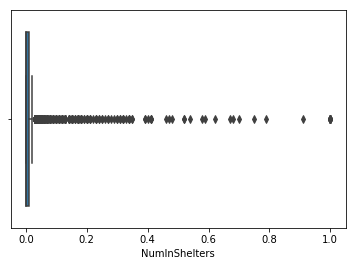

In [19]:
sns.boxplot(x=Data_e['NumInShelters'])
plt.show()

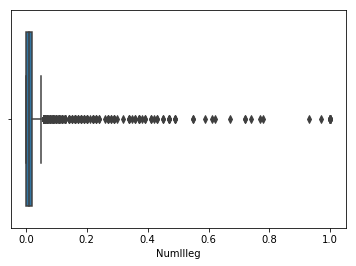

In [20]:
sns.boxplot(x=Data_e['NumIlleg'])
plt.show()

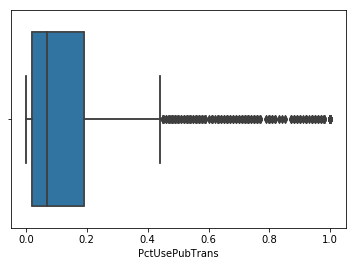

In [22]:
sns.boxplot(x=Data_e['PctUsePubTrans'])
plt.show()

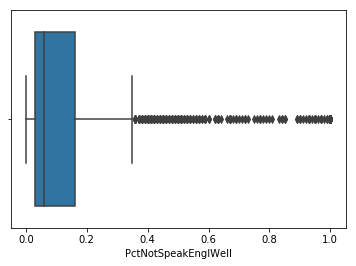

In [23]:
sns.boxplot(x=Data_e['PctNotSpeakEnglWell'])
plt.show()

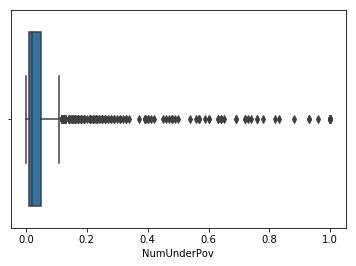

In [24]:
sns.boxplot(x=Data_e['NumUnderPov'])
plt.show()

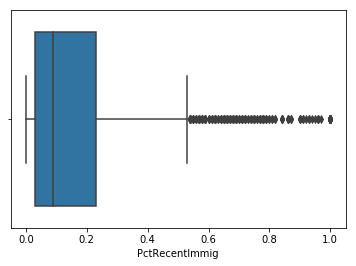

In [25]:
sns.boxplot(x=Data_e['PctRecentImmig'])
plt.show()

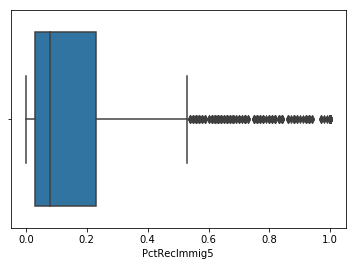

In [26]:
sns.boxplot(x=Data_e['PctRecImmig5'])
plt.show()

### f) Fit a linear model using least squares to the training set and report the test error

In [33]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_TrainingData, y_TrainingData)
y_pred = reg.predict(x_TestingData)

from sklearn.metrics import mean_squared_error
test_error = mean_squared_error(y_TestingData, y_pred)

print('The test error is', test_error)

The test error is 1.52744807584e+18


### g) Fit a ridge regression model on the training set, with λ chosen by cross-validation. Report the test error obtained.

In [34]:
from sklearn.linear_model import RidgeCV

clf = RidgeCV(cv=10, normalize=False).fit(x_TrainingData, y_TrainingData)

print('λ: ',clf.alpha_)
print('The test error is: ', 1 - clf.score(x_TestingData, y_TestingData) )

λ:  1.0
The test error is:  0.367716733739


### h) Fit a LASSO model on the training set, with λ chosen by cross-validation. Report the test error obtained, along with a list of the variables selected by the model. Repeat with normalized features. Report the test error for both cases and compare them.

In [35]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LassoCV

reg = LassoCV(cv=5).fit(x_TrainingData, y_TrainingData)
test_error = 1 - reg.score(x_TestingData, y_TestingData)

print('λ: ',reg.alpha_)
print('The test error is: ', test_error) 

λ:  8.78611248338e-05
The test error is:  0.365197850892


In [36]:
reg = LassoCV(cv=10,normalize=True).fit(x_TrainingData, y_TrainingData)
normalized_test_error = 1 - reg.score(x_TestingData, y_TestingData)

print('λ: ',reg.alpha_)
print('The normalized test error is: ', normalized_test_error) 

λ:  1.39231099037e-05
The normalized test error is:  0.365918380123


In [31]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

clf = LassoCV(cv=10,normalize=True)

sfm = SelectFromModel(clf)
sfm.fit(x_TrainingData, y_TrainingData)
features = sfm.get_support()

selected_features = []
for i,name in enumerate(x_TrainingData.columns):
    if features[i] == True:
        selected_features.append(name)

print('The features are: ', selected_features)

The features are:  ['population', 'racepctblack', 'racePctAsian', 'agePct12t21', 'agePct12t29', 'numbUrban', 'pctUrban', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctEmploy', 'PctEmplManu', 'PctOccupManu', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMom', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecImmig10', 'PctNotSpeakEnglWell', 'PctLargHouseOccup', 'PersPerOccupHous', 'PersPerOwnOccHous', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'HousVacant', 'PctHousOccup', 'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart', 'RentLowQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg', 'NumInShelter

### (i) Fit a PCR model on the training set, with M (the number of principal components) chosen by cross-validation. Report the test error obtained.

In [42]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

pca2 = PCA()
regr = LinearRegression()


x_training = np.array(x_TrainingData)
y_training = np.array(y_TrainingData)
X_reduced_train = pca2.fit_transform(scale(x_training))
n = len(X_reduced_train)

kf_10 = model_selection.KFold( n_splits=10, shuffle=True, random_state=1)

mse = []

score = -1*model_selection.cross_val_score(regr, np.ones((n,1)), y_training.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

for i in np.arange(1, 123):
    score = -1*model_selection.cross_val_score(regr, X_reduced_train[:,:i], y_training.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
print(mse)
min_mse = min(mse)

print('The MSE is ',min_mse)

[0.056545240946666395, 0.034833623562784063, 0.029276267377883303, 0.029212786670069567, 0.029000660151395907, 0.025224124530669457, 0.025097463288928101, 0.025112599689796573, 0.022305333377986222, 0.020516628096231872, 0.020528944422382182, 0.020518411198267913, 0.020476400828141304, 0.0204515907109818, 0.020429122253132051, 0.020343494501268343, 0.020337365887103036, 0.020347860458452913, 0.020260884540274141, 0.020264637640103379, 0.020282102907750246, 0.02031001331577682, 0.020295797719909119, 0.020292723787232701, 0.020073653090386268, 0.02012282444150975, 0.020143267616573108, 0.020067703923067469, 0.019853530577132961, 0.019811187436834011, 0.019801031212384908, 0.019733362321029069, 0.019733685492188752, 0.019751987286804197, 0.019802149763781158, 0.019827807011593385, 0.019848042900888221, 0.019858665884830335, 0.019751496087264918, 0.019787933781772432, 0.019743160189648803, 0.019773941508337098, 0.019764185241481692, 0.019687187969473063, 0.019644992437463146, 0.01965881914

In [118]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

pca2 = PCA()
regr = LinearRegression()

x_training = np.array(x_TrainingData)
y_training = np.array(y_TrainingData)

X_reduced_train = pca2.fit_transform(scale(x_training))
n = len(X_reduced_train)

kf_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)

mse = []

# Calculate 123 MSE

score = -1*model_selection.cross_val_score(regr, np.ones((n,1)), y_training.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

for i in np.arange(1, 123):
    score = -1*model_selection.cross_val_score(regr, X_reduced_train[:,:i], y_training.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
print(mse)

[0.056545240946666395, 0.034833623562784063, 0.029276267377883303, 0.029212786670069567, 0.029000660151395907, 0.025224124530669457, 0.025097463288928101, 0.025112599689796573, 0.022305333377986222, 0.020516628096231872, 0.020528944422382182, 0.020518411198267913, 0.020476400828141304, 0.0204515907109818, 0.020429122253132051, 0.020343494501268343, 0.020337365887103036, 0.020347860458452913, 0.020260884540274141, 0.020264637640103379, 0.020282102907750246, 0.02031001331577682, 0.020295797719909119, 0.020292723787232701, 0.020073653090386268, 0.02012282444150975, 0.020143267616573108, 0.020067703923067469, 0.019853530577132961, 0.019811187436834011, 0.019801031212384908, 0.019733362321029069, 0.019733685492188752, 0.019751987286804197, 0.019802149763781158, 0.019827807011593385, 0.019848042900888221, 0.019858665884830335, 0.019751496087264918, 0.019787933781772432, 0.019743160189648803, 0.019773941508337098, 0.019764185241481692, 0.019687187969473063, 0.019644992437463146, 0.01965881914

In [43]:
min_mse = min(mse)
print(min_mse)

0.0192135076818


In [44]:
x_testing_data = np.array(x_TestingData)
y_testing_data = np.array(y_TestingData)
pca2 = PCA()

X_reduced_test = pca2.fit_transform(scale(x_testing_data))[:,:94]

regr = LinearRegression()
regr.fit(X_reduced_train[:,:94], y_TrainingData)

pred = regr.predict(X_reduced_test)
mean_squared_error(y_testing_data, pred)

0.032795621084453629

### (j) In this section, we would like to fit a boosting tree to the data. As in classification trees, one can use any type of regression at each node to build a multivariate regression tree. Because the number of variables is large in this problem, one can use L1-penalized regression at each node. Such a tree is called L1 penalized gradient boosting tree. You can use XGBoost2 to fit the model tree. Determine α (the regularization term) using cross-validation.

In [54]:
# Ensure that you are downloading one of the following:
#   * xgboost-{version}-py2.py3-none-manylinux1_x86_64.whl
#   * xgboost-{version}-py2.py3-none-win_amd64.whl
# pip3 install xgboost

In [57]:
import xgboost
from sklearn.model_selection import KFold
a = 10**np.linspace(10,-2,100)*0.5

a_mse = {}

In [61]:
for a in a_mse:
    fold = KFold(n_splits=10)
    a_mse = []
    for train_index, test_index in fold.split(x_TrainingData):
        x_train, x_test = x_TrainingData.iloc[train_index.tolist(),:], x_TrainingData.iloc[test_index.tolist(),:]
        y_train, y_test = y_TrainingData.iloc[train_index.tolist(),:], y_TrainingData.iloc[test_index.tolist(),:]
        
        clf = xgboost.XGBRegressor(random_state=0, silent=False, reg_alpha=alpha)
        clf.fit(x_train,y_train)
        y_pred = clf.predict(x_test)
        a_mse.append(mean_squared_error(y_test, y_pred))

# 2. Tree-Based Methods

### (a) Download the APS Failure data from: https://archive.ics.uci.edu/ml/datasets/ APS+Failure+at+Scania+Trucks . The dataset contains a training set and a test set. The training set contains 60,000 rows, of which 1,000 belong to the positive class and 171 columns, of which one is the class column. All attributes are numeric.
### b-i). Research what types of techniques are usually used for dealing with data with missing values.4 Pick at least one of them and apply it to this data in the next steps.

In [81]:
training_2_data = pd.read_csv('aps_failure_training_set.csv', skiprows=20)
y_training_2_data = training_2_data[["class"]]
x_training_2_data = training_2_data.drop("class", axis=1)
x_training_2_data = x_training_2_data.replace("na", np.nan)
mean_value = Imputer(missing_values=np.nan, strategy='mean', axis=1)
x_training_2_data = pd.DataFrame(mean_value.fit_transform(x_training_2_data), columns=x_training_2_data.columns)
x_training_2_data

aa_000        ab_000        ac_000        ad_000  ae_000  af_000  \
0       76698.0  1.377036e+07  2.130706e+09  2.800000e+02     0.0     0.0   
1       33058.0  4.461603e+05  0.000000e+00  4.461603e+05     0.0     0.0   
2       41040.0  3.225849e+05  2.280000e+02  1.000000e+02     0.0     0.0   
3          12.0  0.000000e+00  7.000000e+01  6.600000e+01     0.0    10.0   
4       60874.0  6.269397e+05  1.368000e+03  4.580000e+02     0.0     0.0   
5       38312.0  1.354696e+07  2.130706e+09  2.180000e+02     0.0     0.0   
6          14.0  0.000000e+00  6.000000e+00  9.431018e+03     0.0     0.0   
7      102960.0  1.377775e+07  2.130706e+09  1.160000e+02     0.0     0.0   
8       78696.0  9.551237e+05  0.000000e+00  9.551237e+05     0.0     0.0   
9      153204.0  0.000000e+00  1.820000e+02  6.336441e+05     0.0     0.0   
10      39196.0  3.560546e+05  2.040000e+02  1.700000e+02     0.0     0.0   
11      45912.0  4.120016e+05  0.000000e+00  4.540000e+02     0.0     0.0   
12       2104.0  3.439601e+04  3.600000e+01  2.600000e+01     0.0     0.0   
13     118950.0  1.545870e+06  1.390000e+03  1.298000e+03     0.0     0.0   
14      24416.0  2.690418e+05  0.000000e+00  2.690418e+05     0.0     0.0   
15         14.0  0.000000e+00  6.200000e+01  3.400000e+01     0.0     0.0   
16      31300.0  0.000000e+00  7.840000e+02  7.400000e+02     0.0     0.0   
17        736.0  2.000000e+00  2.400000e+01  2.200000e+01    16.0    20.0   
18        332.0  1.333083e+07  2.130706e+09  2.000000e+01     0.0     0.0   
19       1432.0  1.334242e+07  2.130706e+09  8.200000e+01     0.0     0.0   
20      41212.0  0.000000e+00  2.130706e+09  1.040000e+02   104.0   172.0   
21         14.0  8.602389e+03  6.000000e+00  6.000000e+00     0.0     0.0   
22     157128.0  1.434028e+07  2.130706e+09  4.240000e+02     0.0     0.0   
23     453236.0  8.788944e+06  2.926000e+03  8.788944e+06     0.0     0.0   
24      58246.0  1.378208e+07  2.130706e+09  2.416000e+03     0.0     0.0   
25      29394.0  4.821387e+05  0.000000e+00  4.821387e+05     0.0     0.0   
26       8690.0  1.044945e+05  4.760000e+02  3.640000e+02     0.0     0.0   
27      46978.0  6.862386e+05  3.340000e+02  3.220000e+02     0.0     0.0   
28       1870.0  2.718019e+04  2.718019e+04  2.718019e+04     0.0     0.0   
29      12516.0  0.000000e+00  1.200000e+02  2.478098e+05     0.0     0.0   
...         ...           ...           ...           ...     ...     ...   
59970      16.0  0.000000e+00  8.000000e+00  1.038758e+04     0.0     0.0   
59971   39026.0  3.366789e+05  2.020000e+02  1.680000e+02     0.0     0.0   
59972      14.0  8.919798e+03  2.400000e+01  2.000000e+01     0.0     0.0   
59973    3248.0  8.000000e+00  1.600000e+01  1.000000e+01     0.0     0.0   
59974   83818.0  9.567028e+05  5.520000e+02  5.320000e+02     0.0     0.0   
59975   40274.0  3.198170e+05  9.800000e+01  9.400000e+01     0.0     0.0   
59976   16978.0  1.341687e+07  2.130706e+09  1.750000e+03     0.0     0.0   
59977   30320.0  4.373161e+05  1.838000e+03  1.278000e+03     0.0     0.0   
59978   38414.0  4.865767e+05  8.880000e+02  7.580000e+02     0.0     0.0   
59979      18.0  0.000000e+00  2.130706e+09  1.800000e+01     0.0     0.0   
59980     562.0  0.000000e+00  4.000000e+00  4.000000e+00     0.0     0.0   
59981      16.0  1.719163e+04  2.000000e+01  2.000000e+01     0.0     0.0   
59982   10628.0  1.351001e+07  2.130706e+09  9.800000e+01     0.0     0.0   
59983   39004.0  5.709672e+05  9.000000e+01  8.400000e+01     0.0     0.0   
59984   33386.0  3.393716e+05  8.120000e+02  7.440000e+02     0.0     0.0   
59985   10792.0  5.346259e+05  7.840000e+02  6.080000e+02     0.0     0.0   
59986     644.0  2.823676e+04  1.200000e+01  2.823676e+04     0.0     0.0   
59987   41330.0  1.358615e+07  2.130706e+09  7.440000e+02     0.0     0.0   
59988    6078.0  8.351767e+04  5.200000e+01  4.600000e+01     0.0     0.0   
59989   61478.0  5.707213e+05  1.340000e+02  0.000000e+00     0.0     0.0   
59990

In [82]:
testing_2_data = pd.read_csv('aps_failure_test_set.csv', skiprows=20)
y_testing_2_data = testing_2_data[["class"]]
x_testing_2_data = testing_2_data.drop("class", axis=1)
x_testing_2_data = x_testing_2_data.replace("na", np.nan)
mean_value = Imputer(missing_values=np.nan, strategy='mean', axis=1)
x_testing_2_data = pd.DataFrame(mean_value.fit_transform(x_testing_2_data), columns=x_testing_2_data.columns)
x_testing_2_data

aa_000        ab_000        ac_000        ad_000        ae_000  \
0           60.0  0.000000e+00  2.000000e+01  1.200000e+01  0.000000e+00   
1           82.0  0.000000e+00  6.800000e+01  4.000000e+01  0.000000e+00   
2        66002.0  2.000000e+00  2.120000e+02  1.120000e+02  0.000000e+00   
3        59816.0  5.037268e+05  1.010000e+03  9.360000e+02  0.000000e+00   
4         1814.0  2.648313e+04  1.560000e+02  1.400000e+02  0.000000e+00   
5          174.0  1.803356e+04  2.600000e+01  2.400000e+01  0.000000e+00   
6        40202.0  3.927398e+05  6.400000e+02  6.060000e+02  0.000000e+00   
7       120278.0  1.436686e+07  2.130706e+09  2.560000e+02  0.000000e+00   
8        14592.0  0.000000e+00  2.130706e+09  1.620000e+02  0.000000e+00   
9        28338.0  1.355777e+07  2.130706e+09  2.380000e+02  0.000000e+00   
10       30758.0  4.497749e+05  4.500000e+02  4.020000e+02  0.000000e+00   
11       40358.0  3.221409e+05  1.672000e+03  1.378000e+03  0.000000e+00   
12       33072.0  6.717477e+05  6.717477e+05  6.717477e+05  6.717477e+05   
13       30664.0  3.499755e+05  5.300000e+02  5.140000e+02  0.000000e+00   
14       41628.0  1.362736e+07  2.130706e+09  3.800000e+02  0.000000e+00   
15        1204.0  0.000000e+00  2.130706e+09  1.440837e+07  0.000000e+00   
16        1434.0  2.181338e+04  3.200000e+01  2.600000e+01  0.000000e+00   
17       31576.0  3.446459e+05  3.780000e+02  3.500000e+02  0.000000e+00   
18       30812.0  1.356743e+07  2.130706e+09  1.440000e+02  0.000000e+00   
19         846.0  1.729382e+04  1.000000e+02  5.200000e+01  0.000000e+00   
20       42676.0  3.988651e+05  6.960000e+02  5.480000e+02  0.000000e+00   
21          30.0  9.225215e+03  3.400000e+01  3.200000e+01  0.000000e+00   
22      121576.0  1.338241e+06  1.218000e+03  1.338241e+06  0.000000e+00   
23       24272.0  2.172062e+05  1.760000e+02  1.680000e+02  0.000000e+00   
24       98470.0  1.371103e+07  2.130706e+09  2.840000e+02  0.000000e+00   
25         970.0  0.000000e+00  2.130706e+09  5.200000e+01  0.000000e+00   
26           8.0  0.000000e+00  1.000000e+01  1.000000e+01  0.000000e+00   
27       63496.0  6.551639e+05  1.094000e+03  0.000000e+00  0.000000e+00   
28         844.0  0.000000e+00  2.600000e+01  2.600000e+01  0.000000e+00   
29       32200.0  2.416533e+05  5.640000e+02  0.000000e+00  0.000000e+00   
...          ...           ...           ...           ...           ...   
15970    41416.0  3.494735e+05  1.020000e+02  9.800000e+01  0.000000e+00   
15971    30346.0  8.456787e+05  0.000000e+00  8.456787e+05  0.000000e+00   
15972    61584.0  8.387965e+05  8.600000e+02  3.980000e+02  0.000000e+00   
15973    39310.0  3.722718e+05  4.980000e+02  4.340000e+02  0.000000e+00   
15974        2.0  7.242505e+04  4.000000e+00  4.000000e+00  0.000000e+00   
15975      724.0  0.000000e+00  1.000000e+01  8.000000e+00  0.000000e+00   
15976    32540.0  2.412221e+05  7.300000e+02  1.520000e+03  0.000000e+00   
15977  1084610.0  8.942476e+06  8.942476e+06  8.942476e+06  8.942476e+06   
15978     1138.0  0.000000e+00  4.400000e+01  4.882151e+04  0.000000e+00   
15979        8.0  0.000000e+00  1.200000e+01  4.000000e+00  0.000000e+00   
15980    38636.0  3.365385e+05  1.180000e+02  1.120000e+02  0.000000e+00   
15981    61998.0  5.366946e+05  2.816000e+03  2.590000e+03  0.000000e+00   
15982     1104.0  3.011554e+04  8.800000e+01  8.200000e+01  0.000000e+00   
15983    40350.0  1.357537e+07  2.130706e+09  4.300000e+02  0.000000e+00   
15984   136186.0  1.434752e+07  2.130706e+09  2.226000e+03  0.000000e+00   
15985    40542.0  3.125050e+05  5.000000e+01  4.800000e+01  0.000000e+00   
15986      186.0  1.699194e+04  1.400000e+01  1.400000e+01  0.000000e+00   
15987    40586.0  3.515635e+05  5.780000e+02  4.760000e+02  0.000000e+00   
15988    38532.0  3.081262e+05  0.000000e+00  3.081262e+05  0.000000e+00   
15989      374.0  8.187994e+04  0.000000e+00  8.187994e+04  0.000000e+00   
15990     7256.0  1.591888e+05  2.800000e+02  2.580000e+02

### b-ii). For each of the 170 features, calculate the coefficient of variation CV = s / m , where s is sample variance and m is sample mean.

In [102]:
coefficient_variations = {}
for i in x_training_2_data.columns:
    var = np.var(x_training_2_data[i])
    mean = np.mean(x_training_2_data[i])
    cv = var/mean
    coefficient_variations[i] = cv

print('The CV is',cv)

The CV is 7814505.554868413


In [103]:
coefficient_variations

{'aa_000': 356434.04984931246,
 'ab_000': 9787983.101158587,
 'ac_000': 1793079187.228983,
 'ad_000': 2263681625.979944,
 'ae_000': 7837779.848247131,
 'af_000': 7837534.464251141,
 'ag_000': 18343249.84049557,
 'ag_001': 17024359.097095903,
 'ag_002': 10839162.68592429,
 'ag_003': 7654218.853876534,
 'ag_004': 13001683.139481492,
 'ag_005': 9671673.84607627,
 'ag_006': 9270792.393426595,
 'ag_007': 4301032.190320143,
 'ag_008': 4845445.1394185675,
 'ag_009': 13973241.391880648,
 'ah_000': 9708918.146403551,
 'ai_000': 10542911.939575944,
 'aj_000': 13912092.56561108,
 'ak_000': 10119387.209118428,
 'al_000': 6922798.224482344,
 'am_0': 8755056.405371388,
 'an_000': 17527931.58643641,
 'ao_000': 15486212.23735178,
 'ap_000': 9557532.279795405,
 'aq_000': 3968594.5311031556,
 'ar_000': 7814490.460710962,
 'as_000': 14623624.612563828,
 'at_000': 11910005.167560788,
 'au_000': 14539877.327886691,
 'av_000': 7756798.107457313,
 'ax_000': 7799178.477741594,
 'ay_000': 17602948.8265687,
 'a

### b-iii) Plot a correlation matrix for your features using pandas or any other tool

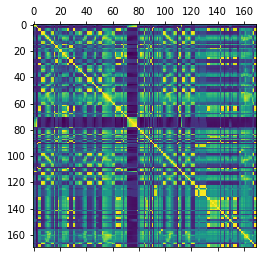

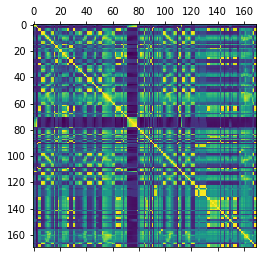

In [91]:
plt.matshow(x_training_2_data.corr())
plt.show()

### b-iv) Pick  √170  features with highest CV , and make scatter plots and box plots for them, similar to those on p. 129 of ISLR. Can you draw conclusions about significance of those features, just by the scatter plots? This does not mean that you will only use those features in the following questions. We picked them only for visualization.

In [104]:
number_of_features = np.sqrt(170)
number_of_features

13.038404810405298

In [105]:
highest_cv_features = sorted(coefficient_variations, key=coefficient_variations.get, reverse=True)[:13]
highest_cv_features

['cf_000',
 'co_000',
 'ad_000',
 'dq_000',
 'ac_000',
 'eb_000',
 'du_000',
 'bb_000',
 'bu_000',
 'bv_000',
 'cq_000',
 'bx_000',
 'cc_000']

In [109]:
data_new = x_training_2_data[highest_cv_features]
data_new

cf_000        co_000        ad_000      dq_000        ac_000  \
0      2.000000e+00  2.200000e+02  2.800000e+02         0.0  2.130706e+09   
1      4.461603e+05  4.461603e+05  4.461603e+05         0.0  0.000000e+00   
2      0.000000e+00  0.000000e+00  1.000000e+02         0.0  2.280000e+02   
3      2.000000e+00  2.000000e+00  6.600000e+01      2014.0  7.000000e+01   
4      0.000000e+00  2.020000e+02  4.580000e+02         0.0  1.368000e+03   
5      2.000000e+00  2.000000e+00  2.180000e+02         0.0  2.130706e+09   
6      9.431018e+03  9.431018e+03  9.431018e+03         0.0  6.000000e+00   
7      2.000000e+00  6.000000e+00  1.160000e+02         0.0  2.130706e+09   
8      9.551237e+05  9.551237e+05  9.551237e+05         0.0  0.000000e+00   
9      6.336441e+05  6.336441e+05  6.336441e+05         0.0  1.820000e+02   
10     0.000000e+00  4.800000e+01  1.700000e+02         0.0  2.040000e+02   
11     0.000000e+00  5.600000e+01  4.540000e+02         0.0  0.000000e+00   
12     0.000000e+00  3.000000e+01  2.600000e+01         0.0  3.600000e+01   
13     8.000000e+00  3.400000e+01  1.298000e+03         0.0  1.390000e+03   
14     2.690418e+05  2.690418e+05  2.690418e+05         0.0  0.000000e+00   
15     2.000000e+00  2.000000e+00  3.400000e+01      2396.0  6.200000e+01   
16     6.200000e+01  2.140000e+02  7.400000e+02   7345640.0  7.840000e+02   
17     2.000000e+00  2.000000e+00  2.200000e+01     17022.0  2.400000e+01   
18     2.000000e+00  2.000000e+00  2.000000e+01         0.0  2.130706e+09   
19     2.000000e+00  0.000000e+00  8.200000e+01         0.0  2.130706e+09   
20     2.000000e+00  2.880000e+02  1.040000e+02   4985196.0  2.130706e+09   
21     2.000000e+00  2.000000e+00  6.000000e+00         0.0  6.000000e+00   
22     2.000000e+00  5.696000e+03  4.240000e+02         0.0  2.130706e+09   
23     8.788944e+06  8.788944e+06  8.788944e+06  73289586.0  2.926000e+03   
24     2.000000e+00  2.000000e+01  2.416000e+03         0.0  2.130706e+09   
25     4.821387e+05  4.821387e+05  4.821387e+05         0.0  0.000000e+00   
26     0.000000e+00  3.400000e+01  3.640000e+02         0.0  4.760000e+02   
27     2.000000e+00  2.000000e+00  3.220000e+02         0.0  3.340000e+02   
28     2.718019e+04  2.718019e+04  2.718019e+04         0.0  2.718019e+04   
29     2.478098e+05  2.478098e+05  2.478098e+05         0.0  1.200000e+02   
...             ...           ...           ...         ...           ...   
59970  1.038758e+04  1.038758e+04  1.038758e+04       866.0  8.000000e+00   
59971  0.000000e+00  9.200000e+01  1.680000e+02         0.0  2.020000e+02   
59972  0.000000e+00  0.000000e+00  2.000000e+01      1322.0  2.400000e+01   
59973  0.000000e+00  2.400000e+01  1.000000e+01         0.0  1.600000e+01   
59974  2.000000e+00  1.200000e+01  5.320000e+02         0.0  5.520000e+02   
59975  2.000000e+00  4.200000e+01  9.400000e+01         0.0  9.800000e+01   
59976  2.000000e+00  3.000000e+01  1.750000e+03         0.0  2.130706e+09   
59977  0.000000e+00  4.000000e+01  1.278000e+03   2452470.0  1.838000e+03   
59978  0.000000e+00  2.000000e+00  7.580000e+02         0.0  8.880000e+02   
59979  2.000000e+00  2.000000e+00  1.800000e+01       162.0  2.130706e+09   
59980  2.000000e+00  6.000000e+00  4.000000e+00     23426.0  4.000000e+00   
59981  2.000000e+00  0.000000e+00  2.000000e+01         0.0  2.000000e+01   
59982  2.000000e+00  6.000000e+00  9.800000e+01         0.0  2.130706e+09   
59983  0.000000e+00  0.000000e+00  8.400000e+01         0.0  9.000000e+01   
59984  0.000000e+00  2.000000e+01  7.440000e+02         0.0  8.120000e+02   
59985  0.000000e+00  3.560000e+03  6.080000e+02         0.0  7.840000e+02   
59986  2.823676e+04  2.823676e+04  2.823676e+04     16630.0  1.200000e+01   
59987  2.000000e+00  1.180000e+02  7.440000e+02         0.0  2.130706e+09   
59988  2.000000e+00  0.000000e+00  4.600000e+01         0.0  5.200000e+01   
59989  0.000000e+00  0.000000e+00  0.000000e+00         0.0  1.340000e+02   
59990  2.

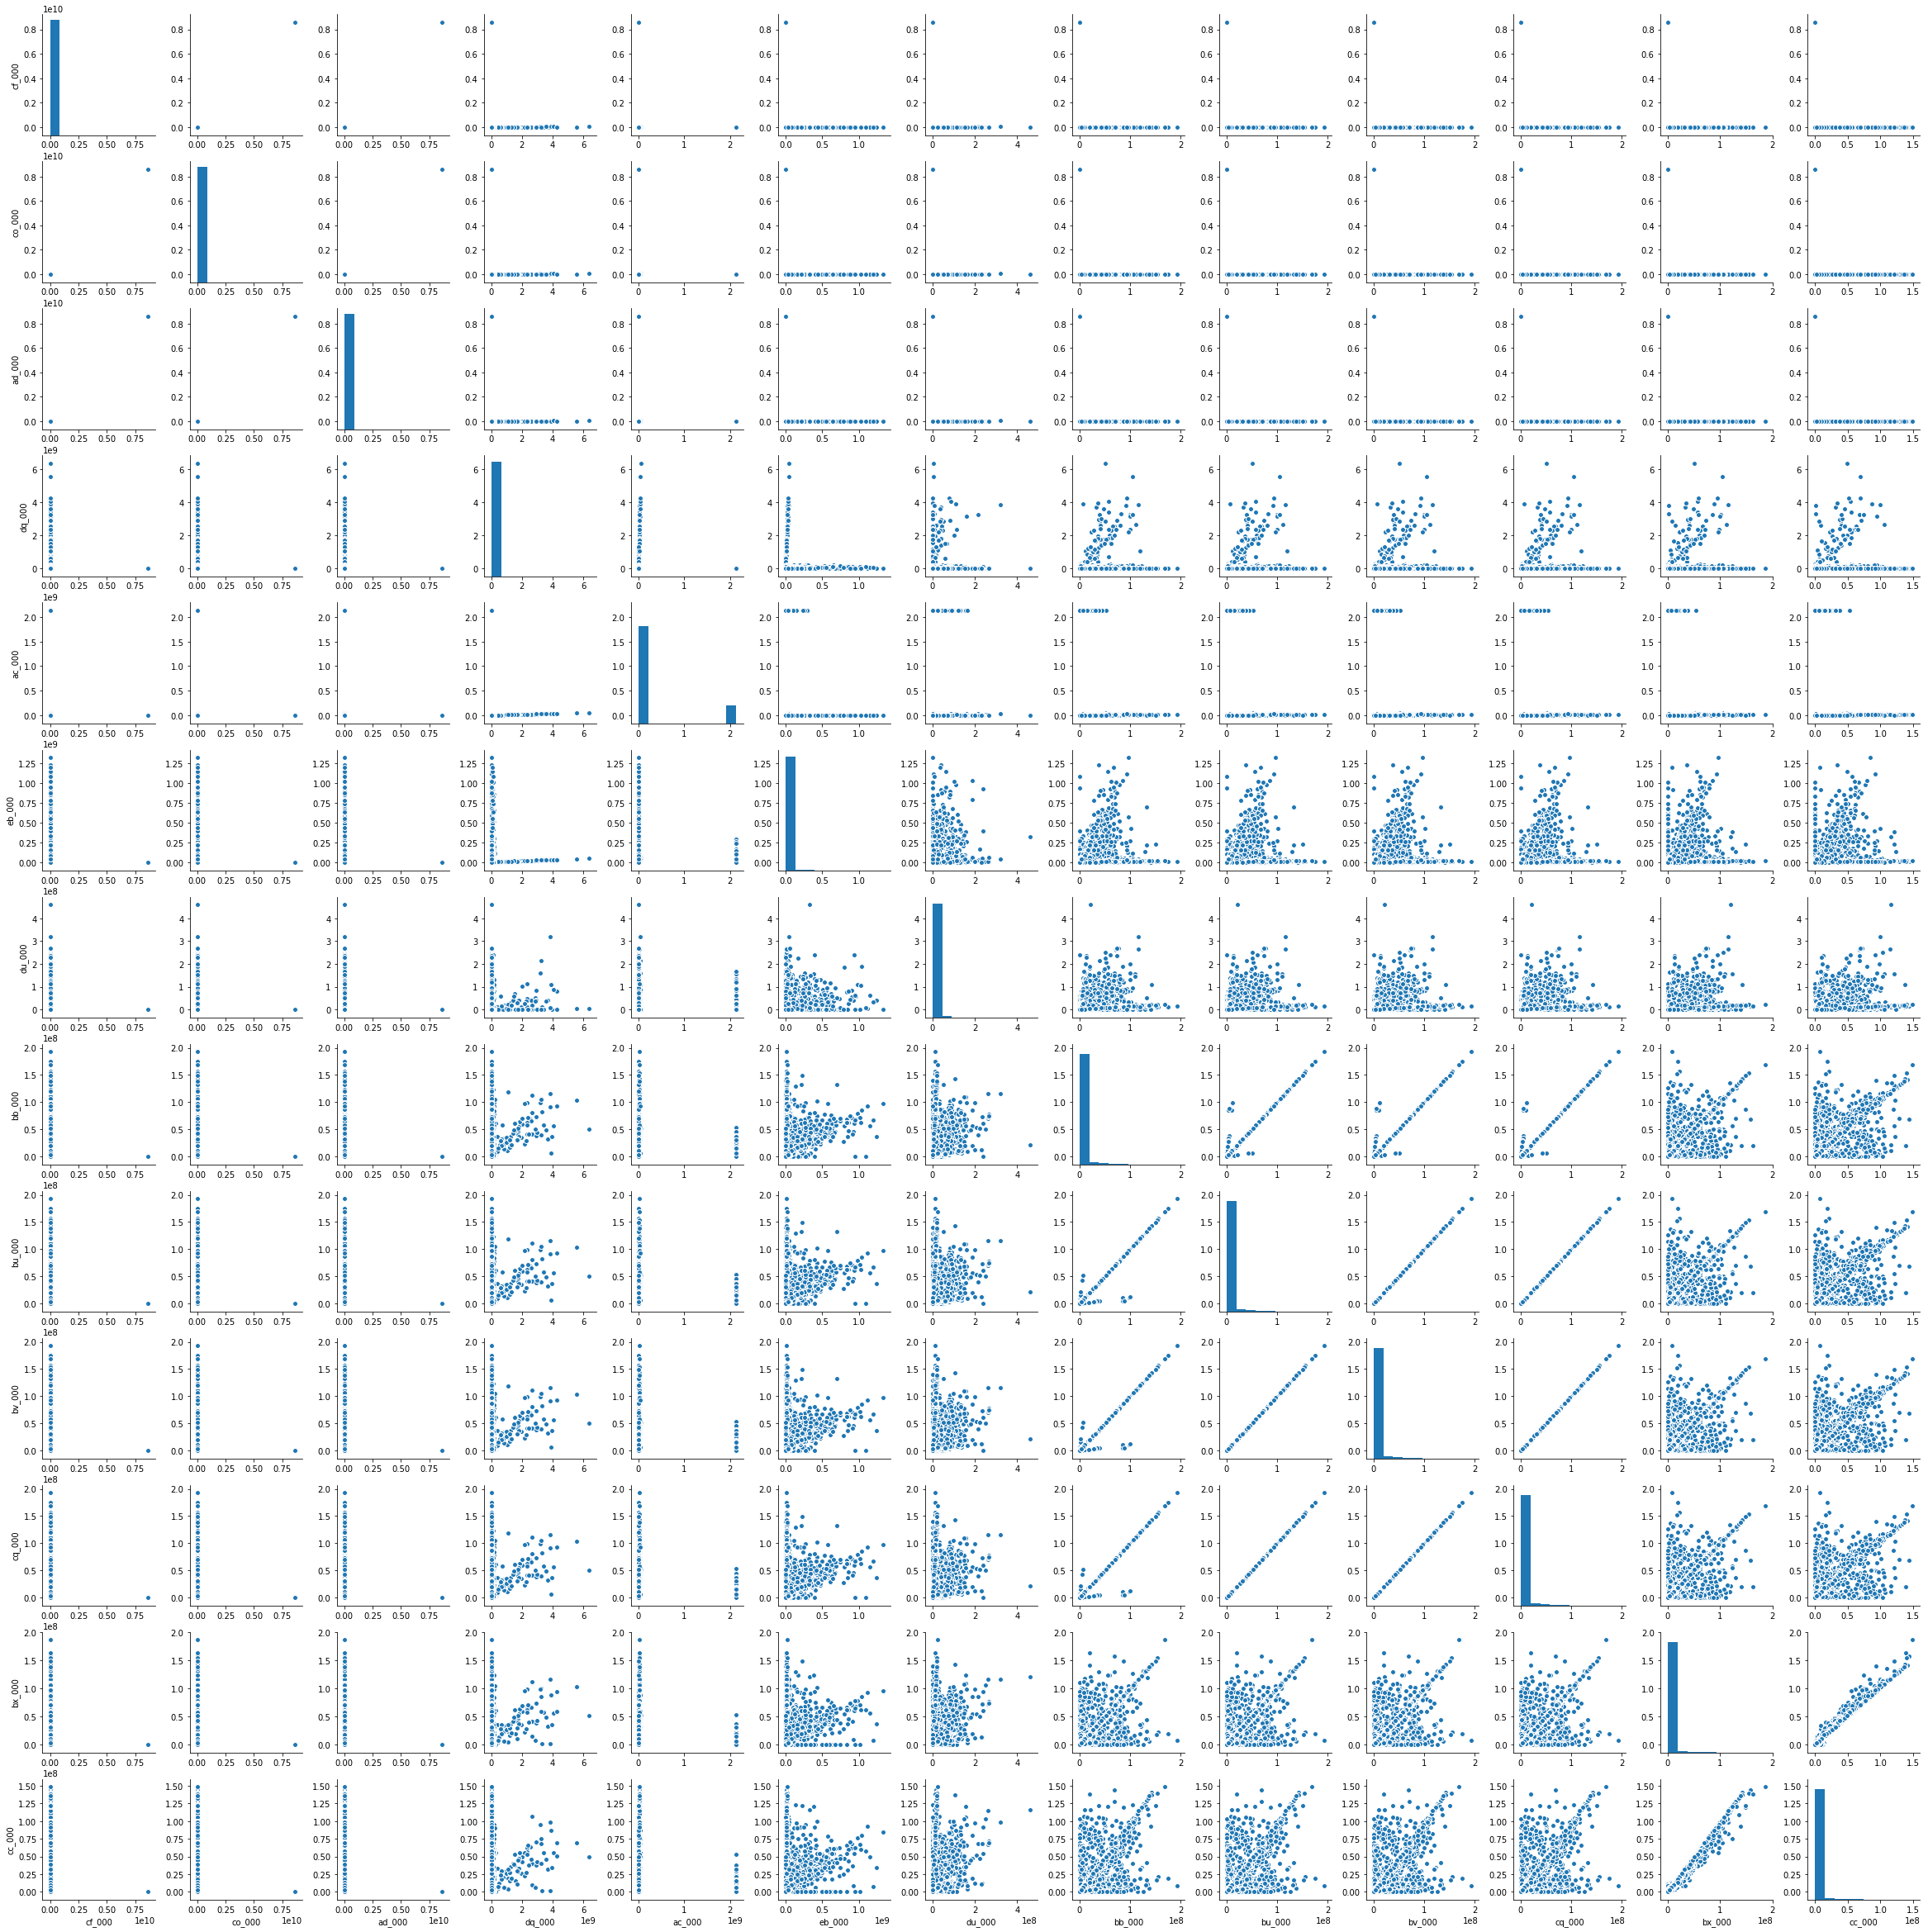

In [110]:
sns.pairplot(data_new)
plt.show()

In [ ]:
##They are high-correlated.

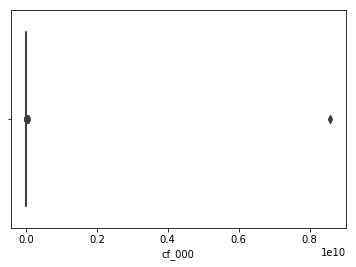

In [113]:
sns.boxplot(x=data_new['cf_000'])
plt.show()

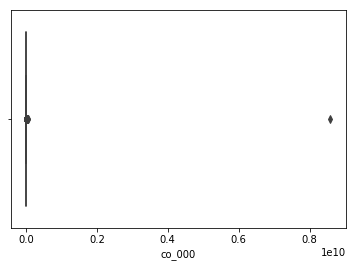

In [50]:
sns.boxplot(x=data_new['co_000'])

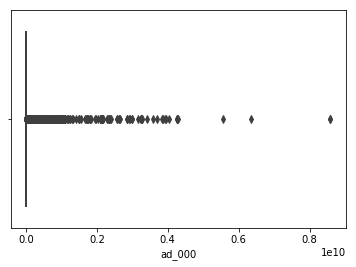

In [119]:
sns.boxplot(x=data_new['ad_000'])
plt.show()

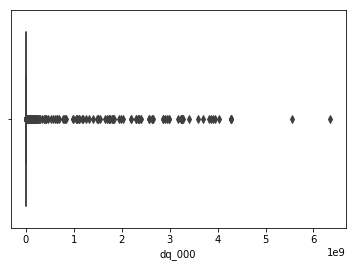

In [120]:
sns.boxplot(x=data_new['dq_000'])
plt.show()

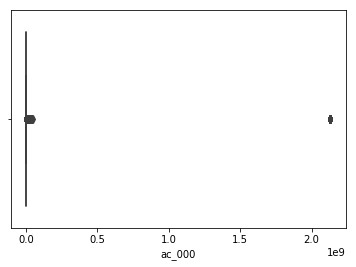

In [121]:
sns.boxplot(x=data_new['ac_000'])
plt.show()

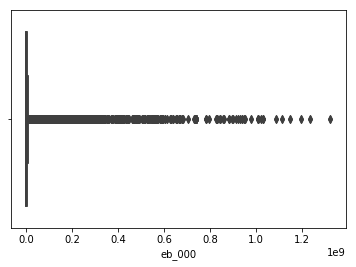

In [123]:
sns.boxplot(x=data_new['eb_000'])
plt.show()

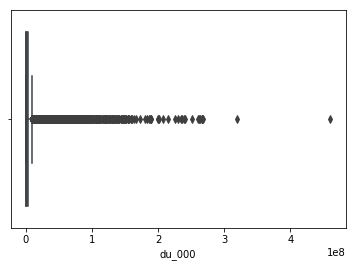

In [124]:
sns.boxplot(x=data_new['du_000'])
plt.show()

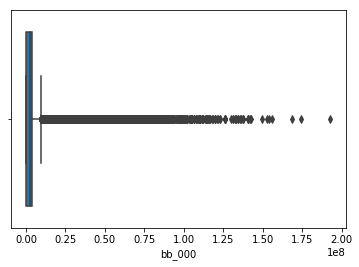

In [126]:
sns.boxplot(x=data_new['bb_000'])
plt.show()

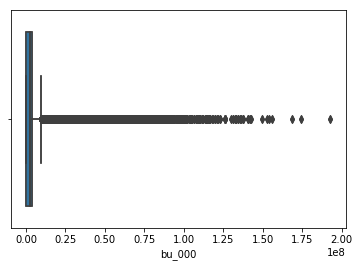

In [128]:
sns.boxplot(x=data_new['bu_000'])
plt.show()

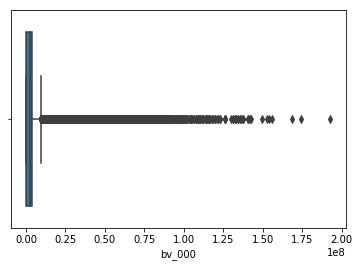

In [129]:
sns.boxplot(x=data_new['bv_000'])
plt.show()

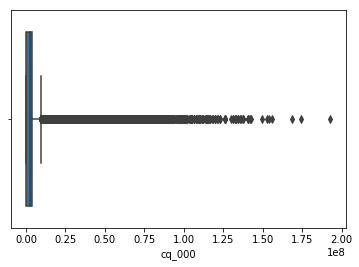

In [130]:
sns.boxplot(x=data_new['cq_000'])
plt.show()

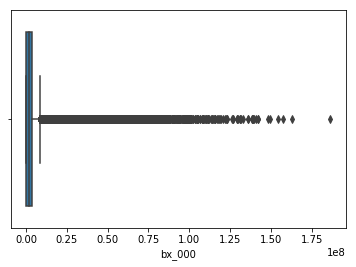

In [131]:
sns.boxplot(x=data_new['bx_000'])
plt.show()

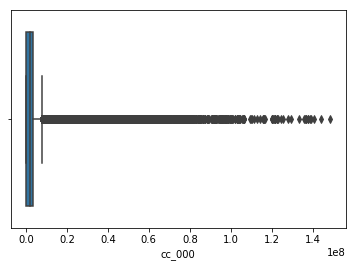

In [132]:
sns.boxplot(x=data_new['cc_000'])
plt.show()

### b-v) Determine the number of positive and negative data. Is this data set imbalanced?

In [133]:
training_2_data['class'].value_counts()

neg    59000
pos     1000
Name: class, dtype: int64

In [ ]:
##It is very imbalanced.

### (c) Train a random forest to classify the data set. Do NOT compensate for class imbalance in the data set. Calculate the confusion matrix, ROC, AUC, and misclassification for training and test sets and report them (You may use pROC package). Calculate Out of Bag error estimate for your random forset and compare it to the test error.

In [135]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100,random_state=0)
clf.fit(x_training_2_data, y_training_2_data)
train_pred = clf.predict(x_training_2_data)

In [139]:
clf.score(x_training_2_data, y_training_2_data)
train_error = 1 - clf.score(x_training_2_data, y_training_2_data)
train_error

0.0

In [140]:
test_pred = clf.predict(x_testing_2_data)
test_error = 1 - clf.score(x_testing_2_data, y_testing_2_data)
test_error

0.0083124999999999449

In [160]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_training_2_data, train_pred)

array([[59000,     0],
       [    0,  1000]])

### d) Research how class imbalance is addressed in random forests. Compensate for class imbalance in your random forest and repeat 2c. Compare the results with those of 2c.


In [141]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100,random_state=0, class_weight="balanced")
clf.fit(x_training_2_data, y_training_2_data)
train_pred = clf.predict(x_training_2_data)
train_error = 1 - clf.score(x_training_2_data, y_training_2_data)
print('The train error is',train_error)

The train error is 0.0


In [150]:
test_pred = clf.predict(x_testing_2_data)
test_error = 1 - clf.score(x_testing_2_data, y_testing_2_data)
print('The test error is',test_error)

The test error is 0.010625


In [146]:
from sklearn.metrics import confusion_matrix
print('The train confusion matrix is',confusion_matrix(y_training_2_data, train_pred))

The train confusion matrix is [[59000     0]
 [    0  1000]]


In [159]:
from sklearn.metrics import accuracy_score
misclassification_train_error = 1 - accuracy_score(y_training_2_data, train_pred)
print('The train misclassification error is',misclassification_train_error)

The train misclassification error is 0.0


In [165]:
from sklearn.metrics import accuracy_score
misclassification_test_error = 1 - accuracy_score(y_testing_2_data, test_pred)
print('The test misclassification error is',misclassification_test_error)

The test misclassification error is 0.010625


In [153]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
y_test = lb.fit_transform(y_testing_2_data)
y_pred = lb.fit_transform(test_pred)

lw=2
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print('Training ROC AUC is',roc_auc)

Training ROC AUC is 0.786346666667


In [157]:
lb = preprocessing.LabelBinarizer()
y_test = lb.fit_transform(y_testing_2_data)
y_pred = lb.fit_transform(test_pred)

lw=2
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print('Tesring ROC AUC is',roc_auc)

Tesring ROC AUC is 0.786346666667


In [164]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100,random_state=0, oob_score=True, class_weight="balanced")
clf.fit(x_training_2_data, y_training_2_data)
obb_error = 1 - clf.oob_score_
print('The out of box error is',obb_error)

The out of box error is 0.00753333333333


# 2(e) Data Preprocessing

In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer

In [166]:
training_new_data = pd.read_csv('aps_failure_training_set.csv', skiprows=20)
# class_mapping = {'neg':0, 'pos':1}
# training_new_data['class'] = training_new_data['class'].map(class_mapping)
y_training_new_data = training_new_data[["class"]]
x_training_new_data = training_new_data.drop("class", axis=1)
x_training_new_data = x_training_new_data.replace("na", np.nan)
mean_value = Imputer(missing_values=np.nan, strategy='mean', axis=1)
x_training_new_data = pd.DataFrame(mean_value.fit_transform(x_training_new_data), columns=x_training_new_data.columns)

In [167]:
testing_new_data = pd.read_csv('aps_failure_test_set.csv', skiprows=20)
# class_mapping = {'neg':0, 'pos':1}
# testing_new_data['class'] = testing_new_data['class'].map(class_mapping)
y_testing_new_data = testing_new_data[["class"]]
x_testing_new_data = testing_new_data.drop("class", axis=1)
x_testing_new_data = x_testing_new_data.replace("na", np.nan)
mean_value = Imputer(missing_values=np.nan, strategy='mean', axis=1)
x_testing_new_data = pd.DataFrame(mean_value.fit_transform(x_testing_new_data), columns=x_testing_new_data.columns)

In [168]:
gt=pd.concat([x_training_new_data[:5000],y_training_new_data[:5000]],axis=1)
gt.to_csv('weka_train.csv',index=False)

In [169]:
gt=pd.concat([x_testing_new_data[:5000],y_testing_new_data[:5000]],axis=1)
gt.to_csv('weka_test.csv',index=False)

# 2(e) Weka Report

=== Run information ===

Scheme:       weka.classifiers.trees.LMT -I -1 -M 15 -W 0.0
Relation:     WEKAtrain
Instances:    5000
Attributes:   171
              [list of attributes omitted]
Test mode:    10-fold cross-validation

=== Classifier model (full training set) ===

Logistic model tree 
------------------

am_0 <= 1719720
|   ag_006 <= 12365274: LM_1:38/114 (4854)
|   ag_006 > 12365274: LM_2:38/114 (79)
am_0 > 1719720: LM_3:38/76 (67)

Number of Leaves  : 	3

Size of the Tree : 	5


LM_1:
Class neg :
2.17 + 
[ag_003] * -0 +
[aj_000] * -0 +
[cd_000] * 0   

Class pos :
-2.17 + 
[ag_003] * 0    +
[aj_000] * 0    +
[cd_000] * -0

LM_2:
Class neg :
0.07 + 
[aj_000] * -0 +
[ee_009] * 0   

Class pos :
-0.07 + 
[aj_000] * 0    +
[ee_009] * -0

LM_3:
Class neg :
1.91 + 
[ag_001] * -0 +
[az_000] * -0

Class pos :
-1.91 + 
[ag_001] * 0    +
[az_000] * 0   


Time taken to build model: 18.69 seconds

=== Stratified cross-validation ===
=== Summary ===

Correctly Classified Instances        4941               98.82   %
Incorrectly Classified Instances        59                1.18   %
Kappa statistic                          0.6321
Mean absolute error                      0.0156
Root mean squared error                  0.0965
Relative absolute error                 44.3558 %
Root relative squared error             73.0007 %
Total Number of Instances             5000     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0.996    0.416    0.992      0.996    0.994      0.635    0.985     1.000     neg
                 0.584    0.004    0.703      0.584    0.638      0.635    0.985     0.690     pos
Weighted Avg.    0.988    0.408    0.987      0.988    0.988      0.635    0.985     0.994     

=== Confusion Matrix ===

    a    b   <-- classified as
 4889   22 |    a = neg
   37   52 |    b = pos



# 2(f) Data Preprocessing

In [170]:
import numpy as np
import pandas as pd
smotetrain = pd.read_csv('train_smote.csv')
y_smotetrain = smotetrain[["class"]]
x_smotetrain = smotetrain.drop("class", axis=1)
gt=pd.concat([x_smotetrain[:2500],y_smotetrain[:2500]],axis=1)
gt.to_csv('train_smote.csv',index=False)

In [171]:
smotetest = pd.read_csv('train_smote.csv')
y_smotetest = smotetest[["class"]]
x_smotetest= smotetest.drop("class", axis=1)
gt=pd.concat([x_smotetest[:5000],y_smotetest[:5000]],axis=1)
gt.to_csv('test_smote.csv',index=False)

# 2(f) Weka Report

=== Run information ===

Scheme:       weka.classifiers.trees.LMT -I -1 -M 15 -W 0.0
Relation:     train_smote
Instances:    2500
Attributes:   171
              [list of attributes omitted]
Test mode:    10-fold cross-validation

=== Classifier model (full training set) ===

Logistic model tree 
------------------
: LM_1:19/19 (2500)

Number of Leaves  : 	1

Size of the Tree : 	1
LM_1:
Class neg :
3.05 + 
[aa_000] * -0

Class pos :
-3.05 + 
[aa_000] * 0   


Time taken to build model: 4.5 seconds

=== Stratified cross-validation ===
=== Summary ===

Correctly Classified Instances        2469               98.76   %
Incorrectly Classified Instances        31                1.24   %
Kappa statistic                          0.6014
Mean absolute error                      0.0181
Root mean squared error                  0.1054
Relative absolute error                 50.5526 %
Root relative squared error             79.2918 %
Total Number of Instances             2500     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0.996    0.467    0.991      0.996    0.994      0.608    0.979     1.000     neg
                 0.533    0.004    0.706      0.533    0.608      0.608    0.979     0.600     pos
Weighted Avg.    0.988    0.458    0.986      0.988    0.987      0.608    0.979     0.992     

=== Confusion Matrix ===

    a    b   <-- classified as
 2445   10 |    a = neg
   21   24 |    b = pos

# ISLR 6.8.3

a) Steadily decreases: 

The training error is maximum when values of B(beta's) are near to 0. As the value of s increase, the value of B(beta's) will also increase and thus the training error will steadily decrease.
    
b) Decrease initially, and then eventually start increasing in a U shape: 

because as the value of s increases the model flexibility also increases.
    
c) Steadily increase: 

When s=0, the model has zero variance. As the value of s increases, the B(beta's) value also increases and thus result in increase in variance.

d) Steadily decrease: 

because as the value of s increases the model flexibility also increases.
    
e) Remains constant: 

Irreducible error does not depends on the choice of s.

# ISLR 8.4.5

a) majority vote approach:
    
 sum of probabilty bigger than 0.5 > sum of probabilty smaller than 0.5
 3.85 > 0.65
 RED. The number of red predictionare bigger than number of green prediction.
 
 
b) average probability approach:
    
 mean(p) = (0.1+0.15+0.2+0.2+0.55+0.6+0.6+0.65+0.7+0.75)/10 = 0.45
 GREEN. The average of the probabilities smaller than the 50% threshold.